In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import missingno as msno
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
df = pd.read_csv("finalDf.csv") 

In [3]:
df_sinPCA = pd.read_csv("df_sinPCA.csv")

In [4]:
df_dry = pd.read_csv("Dataset_drying.csv", encoding='latin-1')

In [5]:
df.head()

,principal component 1,principal component 2,principal component 3,ID_time,ID,Tipo_x,Coating_x
0,-0.719047,3.806783,0.352890,FR_noncoated_30,FR_noncoated,FR,noncoated
1,-0.598014,3.920720,0.368972,FR_noncoated_30,FR_noncoated,FR,noncoated
2,-0.914246,3.797337,0.601327,FR_noncoated_30,FR_noncoated,FR,noncoated
3,0.273527,3.912125,-0.110396,FR_noncoated_30,FR_noncoated,FR,noncoated
4,0.362592,4.190130,1.014498,FR_noncoated_30,FR_noncoated,FR,noncoated


In [6]:
df_sinPCA.head()

,Tipo_,Tipo,Time,Tiempo,RetAreaHue,RetBrig,RetSat,RetAreaRec,RetWE,RetHE,RetRA,Coating,Plate
0,0,FR,10,Short,0.85,1.05,0.86,0.80,0.91,0.88,0.91,noncoated,1
1,0,FR,10,Short,0.86,1.04,0.87,0.89,0.97,0.92,0.93,noncoated,2
2,0,FR,10,Short,1.12,1.01,0.84,1.06,1.02,1.04,1.07,coated,3
3,0,FR,10,Short,0.91,1.03,0.76,0.84,0.93,0.90,0.96,coated,4
4,0,FR,10,Short,0.92,0.99,0.73,0.97,0.97,0.99,0.98,noncoated,5


In [7]:
df_sinPCA["ID"]= df_sinPCA[['Tipo', 'Coating']].apply('_'.join, axis=1)

In [8]:
df_sinPCA["ID_time"]= df_sinPCA["ID"] + "_" + df_sinPCA["Time"].map(str)

In [9]:
df_sinPCA.head()

,Tipo_,Tipo,Time,Tiempo,RetAreaHue,RetBrig,RetSat,RetAreaRec,RetWE,RetHE,RetRA,Coating,Plate,ID,ID_time
0,0,FR,10,Short,0.85,1.05,0.86,0.80,0.91,0.88,0.91,noncoated,1,FR_noncoated,FR_noncoated_10
1,0,FR,10,Short,0.86,1.04,0.87,0.89,0.97,0.92,0.93,noncoated,2,FR_noncoated,FR_noncoated_10
2,0,FR,10,Short,1.12,1.01,0.84,1.06,1.02,1.04,1.07,coated,3,FR_coated,FR_coated_10
3,0,FR,10,Short,0.91,1.03,0.76,0.84,0.93,0.90,0.96,coated,4,FR_coated,FR_coated_10
4,0,FR,10,Short,0.92,0.99,0.73,0.97,0.97,0.99,0.98,noncoated,5,FR_noncoated,FR_noncoated_10


In [10]:
df_dry.head()

,Código Proceso,Tipo,Coating,Drying time,Peso Fruta,P/Po,Peso relativo,Humedad b.h.,H b.h. Relativa,H b.s. (kgW/kgSS),H b.s. Relativa
0,E1,FR,noncoated,0,105.8,1.00,0.00,0.91,0.00,9.96,0.00
1,E1,FR,noncoated,10,100.3,0.95,0.05,0.90,0.01,9.39,0.06
2,E1,FR,noncoated,20,88.5,0.84,0.16,0.89,0.02,8.17,0.18
3,E1,FR,noncoated,30,76.0,0.72,0.28,0.87,0.04,6.88,0.31
4,E1,FR,noncoated,40,64.6,0.61,0.39,0.85,0.06,5.70,0.43


In [11]:
df_dry["ID_time"]=df_dry["Tipo"] + "_" + df_dry["Coating"] + "_" + df_dry["Drying time"].map(str)

In [12]:
df_dry.head()

,Código Proceso,Tipo,Coating,Drying time,Peso Fruta,P/Po,Peso relativo,Humedad b.h.,H b.h. Relativa,H b.s. (kgW/kgSS),H b.s. Relativa,ID_time
0,E1,FR,noncoated,0,105.8,1.00,0.00,0.91,0.00,9.96,0.00,FR_noncoated_0
1,E1,FR,noncoated,10,100.3,0.95,0.05,0.90,0.01,9.39,0.06,FR_noncoated_10
2,E1,FR,noncoated,20,88.5,0.84,0.16,0.89,0.02,8.17,0.18,FR_noncoated_20
3,E1,FR,noncoated,30,76.0,0.72,0.28,0.87,0.04,6.88,0.31,FR_noncoated_30
4,E1,FR,noncoated,40,64.6,0.61,0.39,0.85,0.06,5.70,0.43,FR_noncoated_40


In [13]:
df_dry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Código Proceso     117 non-null    object 
 1   Tipo               117 non-null    object 
 2   Coating            117 non-null    object 
 3   Drying time        117 non-null    int64  
 4   Peso Fruta         117 non-null    float64
 5   P/Po               117 non-null    float64
 6   Peso relativo      117 non-null    float64
 7   Humedad b.h.       117 non-null    float64
 8   H b.h. Relativa    117 non-null    float64
 9   H b.s. (kgW/kgSS)  117 non-null    float64
 10  H b.s. Relativa    117 non-null    float64
 11  ID_time            117 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 11.1+ KB


In [14]:
df_dry.describe().T

,count,mean,std,min,25%,50%,75%,max
Drying time,117.0,53.931624,34.540263,0.00,20.00,50.00,80.00,120.00
Peso Fruta,117.0,60.714530,24.957796,12.30,44.90,59.00,78.70,105.80
P/Po,117.0,0.610855,0.250009,0.12,0.47,0.60,0.83,1.00
Peso relativo,117.0,0.389316,0.249916,0.00,0.17,0.40,0.53,0.88
Humedad b.h.,117.0,0.526667,0.268312,0.03,0.30,0.50,0.82,0.91
H b.h. Relativa,117.0,0.616239,0.481244,0.00,0.10,0.62,1.05,1.50
H b.s. (kgW/kgSS),117.0,2.644786,3.130662,0.03,0.43,1.01,4.43,9.96
H b.s. Relativa,117.0,0.536496,0.312069,0.00,0.27,0.59,0.81,0.98


In [15]:
df_dry.columns=["COD","Tipo","Coating","Drying_time","Peso_Fruta(Pi)","P/Po","W_Rel","W_bh","W_bh_Rel","W_bs","W_bs_Rel", "ID_time"]

In [16]:
df_dry.head()

,COD,Tipo,Coating,Drying_time,Peso_Fruta(Pi),P/Po,W_Rel,W_bh,W_bh_Rel,W_bs,W_bs_Rel,ID_time
0,E1,FR,noncoated,0,105.8,1.00,0.00,0.91,0.00,9.96,0.00,FR_noncoated_0
1,E1,FR,noncoated,10,100.3,0.95,0.05,0.90,0.01,9.39,0.06,FR_noncoated_10
2,E1,FR,noncoated,20,88.5,0.84,0.16,0.89,0.02,8.17,0.18,FR_noncoated_20
3,E1,FR,noncoated,30,76.0,0.72,0.28,0.87,0.04,6.88,0.31,FR_noncoated_30
4,E1,FR,noncoated,40,64.6,0.61,0.39,0.85,0.06,5.70,0.43,FR_noncoated_40


<AxesSubplot:>

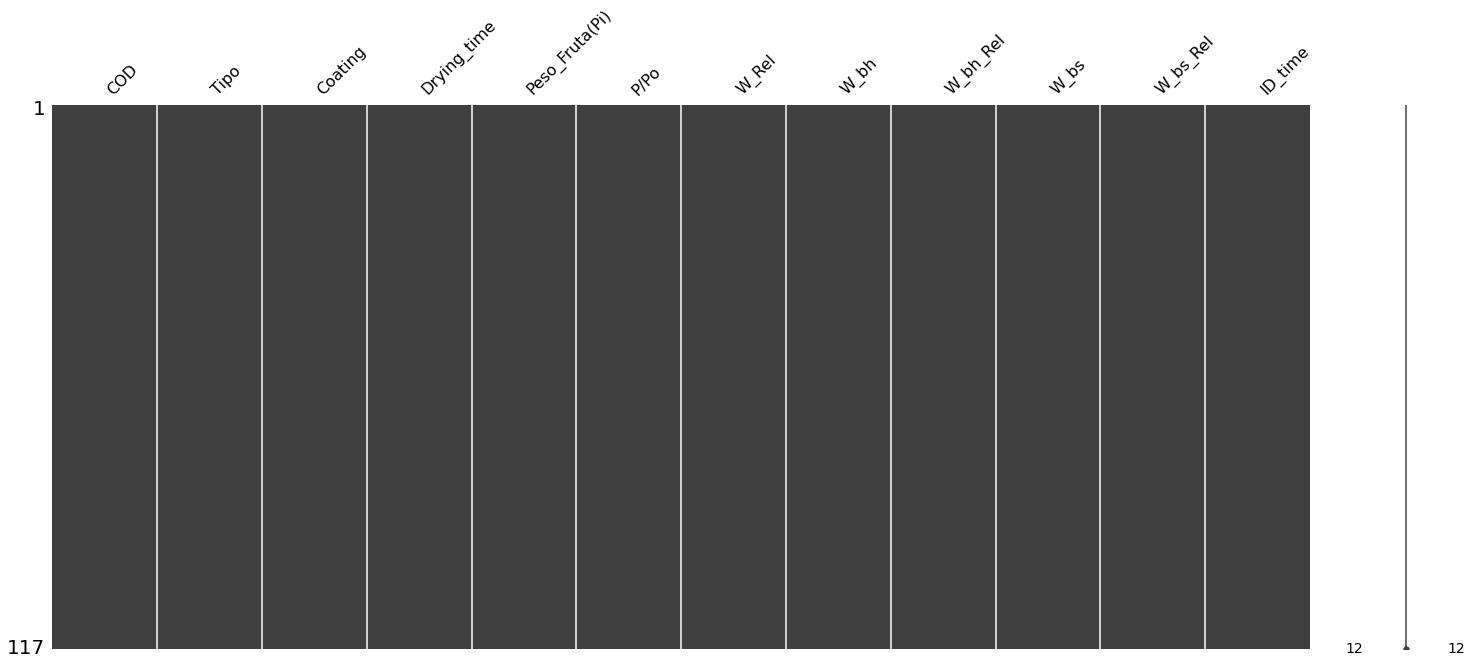

In [17]:
msno.matrix(df_dry)

In [18]:
df=df_dry.merge(df_sinPCA,how='inner',on=['ID_time'])

In [19]:
df.head()

,COD,Tipo_x,Coating_x,Drying_time,Peso_Fruta(Pi),P/Po,W_Rel,W_bh,W_bh_Rel,W_bs,...,RetAreaHue,RetBrig,RetSat,RetAreaRec,RetWE,RetHE,RetRA,Coating_y,Plate,ID
0,E1,FR,noncoated,10,100.3,0.95,0.05,0.9,0.01,9.39,...,0.85,1.05,0.86,0.80,0.91,0.88,0.91,noncoated,1,FR_noncoated
1,E1,FR,noncoated,10,100.3,0.95,0.05,0.9,0.01,9.39,...,0.86,1.04,0.87,0.89,0.97,0.92,0.93,noncoated,2,FR_noncoated
2,E1,FR,noncoated,10,100.3,0.95,0.05,0.9,0.01,9.39,...,0.92,0.99,0.73,0.97,0.97,0.99,0.98,noncoated,5,FR_noncoated
3,E1,FR,noncoated,10,100.3,0.95,0.05,0.9,0.01,9.39,...,0.91,1.00,0.78,0.94,0.94,1.00,0.99,noncoated,6,FR_noncoated
4,E1,FR,noncoated,10,100.3,0.95,0.05,0.9,0.01,9.39,...,0.86,0.99,0.73,0.87,0.96,0.91,0.92,noncoated,9,FR_noncoated


In [20]:
df.shape

(2676, 26)

<AxesSubplot:>

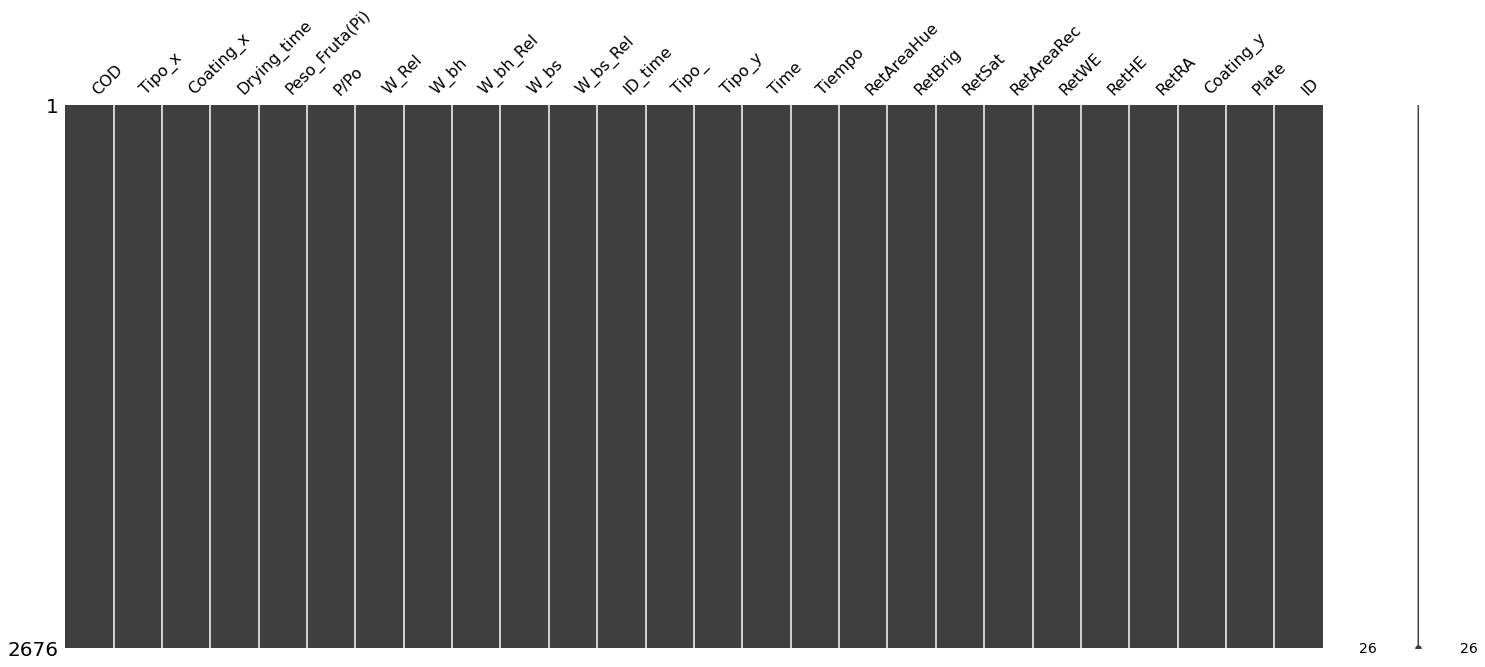

In [21]:
msno.matrix(df)

In [22]:
df.head(20)

,COD,Tipo_x,Coating_x,Drying_time,Peso_Fruta(Pi),P/Po,W_Rel,W_bh,W_bh_Rel,W_bs,...,RetAreaHue,RetBrig,RetSat,RetAreaRec,RetWE,RetHE,RetRA,Coating_y,Plate,ID
0,E1,FR,noncoated,10,100.3,0.95,0.05,0.9,0.01,9.39,...,0.85,1.05,0.86,0.80,0.91,0.88,0.91,noncoated,1,FR_noncoated
1,E1,FR,noncoated,10,100.3,0.95,0.05,0.9,0.01,9.39,...,0.86,1.04,0.87,0.89,0.97,0.92,0.93,noncoated,2,FR_noncoated
2,E1,FR,noncoated,10,100.3,0.95,0.05,0.9,0.01,9.39,...,0.92,0.99,0.73,0.97,0.97,0.99,0.98,noncoated,5,FR_noncoated
3,E1,FR,noncoated,10,100.3,0.95,0.05,0.9,0.01,9.39,...,0.91,1.00,0.78,0.94,0.94,1.00,0.99,noncoated,6,FR_noncoated
4,E1,FR,noncoated,10,100.3,0.95,0.05,0.9,0.01,9.39,...,0.86,0.99,0.73,0.87,0.96,0.91,0.92,noncoated,9,FR_noncoated
5,E1,FR,noncoated,10,100.3,0.95,0.05,0.9,0.01,9.39,...,0.85,1.00,0.68,0.85,0.89,0.95,0.92,noncoated,10,FR_noncoated
6,E1,FR,noncoated,10,100.3,0.95,0.05,0.9,0.01,9.39,...,1.00,1.00,1.00,0.85,0.84,1.00,0.96,noncoated,13,FR_noncoated
7,E1,FR,noncoated,10,100.3,0.95,0.05,0.9,0.01,9.39,...,0.91,1.00,0.97,0.91,0.95,0.96,0.96,noncoated,14,FR_noncoated
8,E1,FR,noncoated,10,100.3,0.95,0.05,0.9,0.01,9.39,...,0.85,1.02,0.97,0.87,0.95,0.92,0.94,noncoated,17,FR_noncoated
9,E1,FR,noncoated,10,100.3,0.95,0.05,0.9,0.01,9.39,...,0.90,1.01,0.95,0.90,0.93,0.96,0.95,noncoated,18,FR_noncoated


In [23]:
df.columns

Index(['COD', 'Tipo_x', 'Coating_x', 'Drying_time', 'Peso_Fruta(Pi)', 'P/Po',
       'W_Rel', 'W_bh', 'W_bh_Rel', 'W_bs', 'W_bs_Rel', 'ID_time', 'Tipo_',
       'Tipo_y', 'Time', 'Tiempo', 'RetAreaHue', 'RetBrig', 'RetSat',
       'RetAreaRec', 'RetWE', 'RetHE', 'RetRA', 'Coating_y', 'Plate', 'ID'],
      dtype='object')

In [24]:
df_= df.drop(['COD', 'Tiempo', "Time", 'Plate', "Tipo_", "Tipo_y", "Coating_y"], axis=1)

In [25]:
df_.columns

Index(['Tipo_x', 'Coating_x', 'Drying_time', 'Peso_Fruta(Pi)', 'P/Po', 'W_Rel',
       'W_bh', 'W_bh_Rel', 'W_bs', 'W_bs_Rel', 'ID_time', 'RetAreaHue',
       'RetBrig', 'RetSat', 'RetAreaRec', 'RetWE', 'RetHE', 'RetRA', 'ID'],
      dtype='object')

In [26]:
df_.columns = ['Tipo', 'Coating', 'Drying_time', 'Peso_Fruta(Pi)', 'P/Po', 'W_Rel',
       'W_bh', 'W_bh_Rel', 'W_bs', 'W_bs_Rel', 'ID_time', 'RetAreaHue',
       'RetBrig', 'RetSat', 'RetAreaRec', 'RetWE', 'RetHE', 'RetRA', 'ID' ]

In [27]:
df_.head()

,Tipo,Coating,Drying_time,Peso_Fruta(Pi),P/Po,W_Rel,W_bh,W_bh_Rel,W_bs,W_bs_Rel,ID_time,RetAreaHue,RetBrig,RetSat,RetAreaRec,RetWE,RetHE,RetRA,ID
0,FR,noncoated,10,100.3,0.95,0.05,0.9,0.01,9.39,0.06,FR_noncoated_10,0.85,1.05,0.86,0.80,0.91,0.88,0.91,FR_noncoated
1,FR,noncoated,10,100.3,0.95,0.05,0.9,0.01,9.39,0.06,FR_noncoated_10,0.86,1.04,0.87,0.89,0.97,0.92,0.93,FR_noncoated
2,FR,noncoated,10,100.3,0.95,0.05,0.9,0.01,9.39,0.06,FR_noncoated_10,0.92,0.99,0.73,0.97,0.97,0.99,0.98,FR_noncoated
3,FR,noncoated,10,100.3,0.95,0.05,0.9,0.01,9.39,0.06,FR_noncoated_10,0.91,1.00,0.78,0.94,0.94,1.00,0.99,FR_noncoated
4,FR,noncoated,10,100.3,0.95,0.05,0.9,0.01,9.39,0.06,FR_noncoated_10,0.86,0.99,0.73,0.87,0.96,0.91,0.92,FR_noncoated


In [28]:
df_.shape

(2676, 19)

                Drying_time  Peso_Fruta(Pi)      P/Po     W_Rel      W_bh  \
Drying_time        1.000000       -0.873808 -0.869390  0.869479 -0.551666   
Peso_Fruta(Pi)    -0.873808        1.000000  0.985775 -0.985710  0.295558   
P/Po              -0.869390        0.985775  1.000000 -0.999973  0.200118   
W_Rel              0.869479       -0.985710 -0.999973  1.000000 -0.200807   
W_bh              -0.551666        0.295558  0.200118 -0.200807  1.000000   
W_bh_Rel           0.417592       -0.120469 -0.020450  0.021161 -0.976187   
W_bs              -0.517583        0.423803  0.326089 -0.327101  0.880987   
W_bs_Rel           0.971235       -0.910094 -0.883882  0.884119 -0.591203   
RetAreaHue        -0.457306        0.677556  0.717525 -0.717664 -0.176276   
RetBrig           -0.624896        0.585047  0.563539 -0.564116  0.434060   
RetSat             0.129986       -0.129704 -0.078342  0.079241 -0.354170   
RetAreaRec        -0.381628        0.605523  0.648424 -0.648501 -0.231487   

<AxesSubplot:>

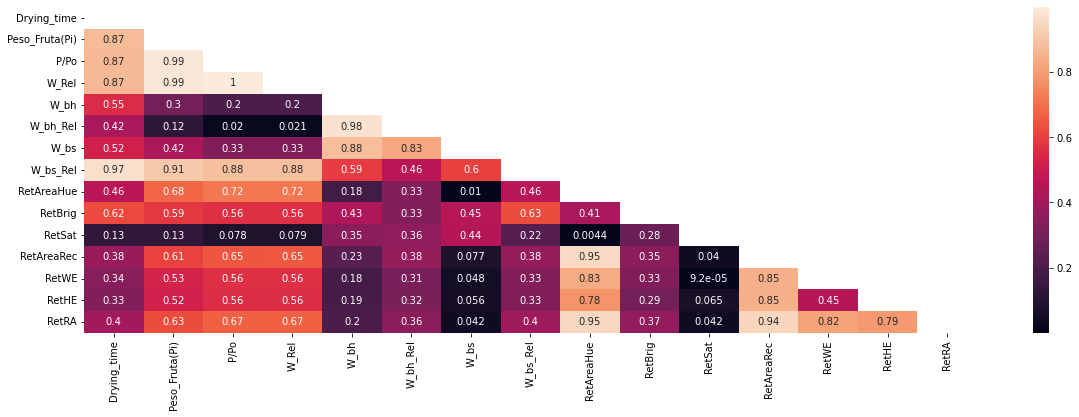

In [29]:
"""CORRELATION MATRIZ"""
import matplotlib.pyplot as plt
import seaborn as sns

print(df_.corr())
print("--------------------------------------------------------------------------------------------------------------------")
print("MATRIZ DE CORRELACIÓN")
plt.figure(figsize=(20,6))
corr = df_.corr()
matrix = np.triu(corr)
sns.heatmap(np.abs(corr), annot=True, mask=matrix)

In [30]:
df_= df_.drop(["Peso_Fruta(Pi)"], axis=1)

## EDA

W_bs_Rel = (Wbs,to - Wbs,t)/Wbs,to

W_Rel = (Wbh,to - Wbh,t)/Wbh,to

W_bs = (Peso Fruta - Contenido_Sólidos_to)/ Contenido_Sólidos_to

In [31]:
import seaborn as sns

<AxesSubplot:xlabel='Drying_time', ylabel='W_bs_Rel'>

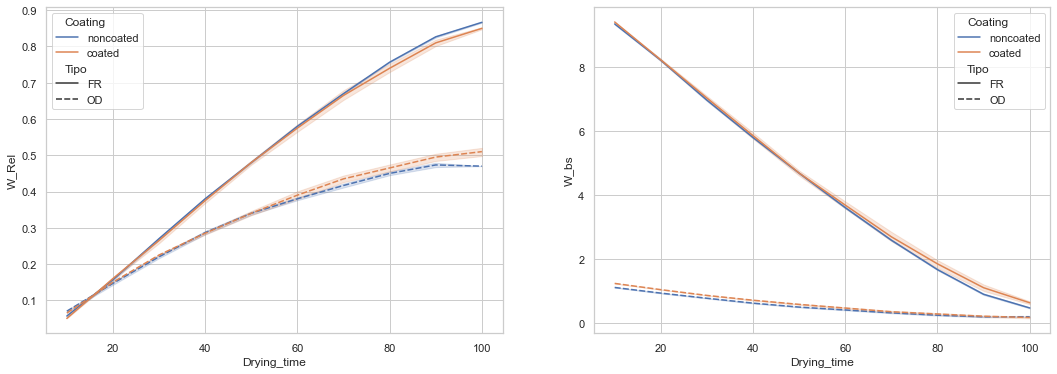

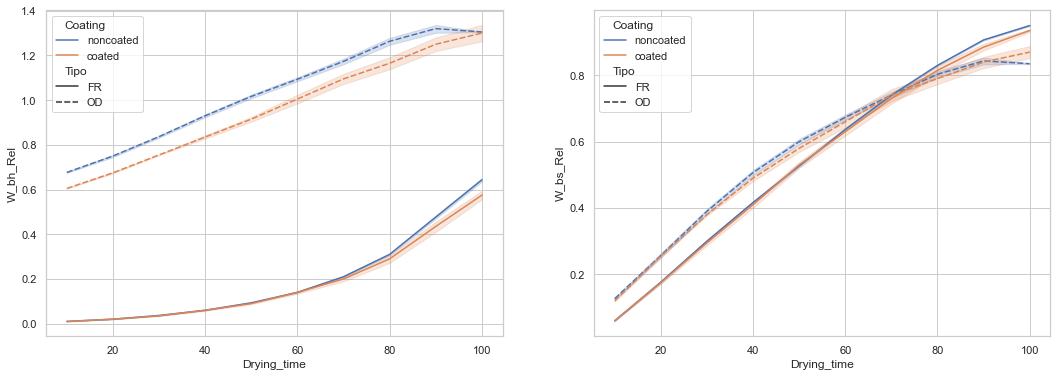

In [32]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.lineplot(x="Drying_time", y="W_Rel",
             hue="Coating", style="Tipo",
             data=df_, ax=axes[0])
sns.lineplot(x="Drying_time", y="W_bs",
             hue="Coating", style="Tipo",
             data=df_, ax=axes[1])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.lineplot(x="Drying_time", y="W_bh_Rel",
             hue="Coating", style="Tipo",
             data=df_, ax=axes[0])
sns.lineplot(x="Drying_time", y="W_bs_Rel",
             hue="Coating", style="Tipo",
             data=df_, ax=axes[1])

<AxesSubplot:xlabel='Drying_time', ylabel='RetRA'>

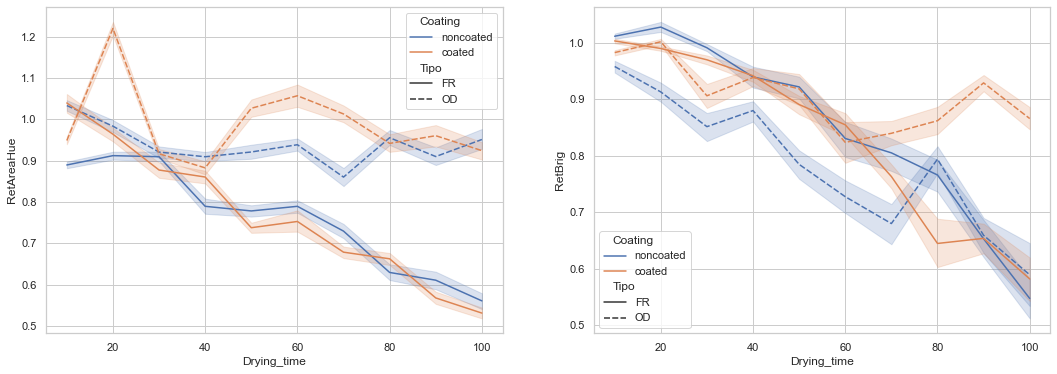

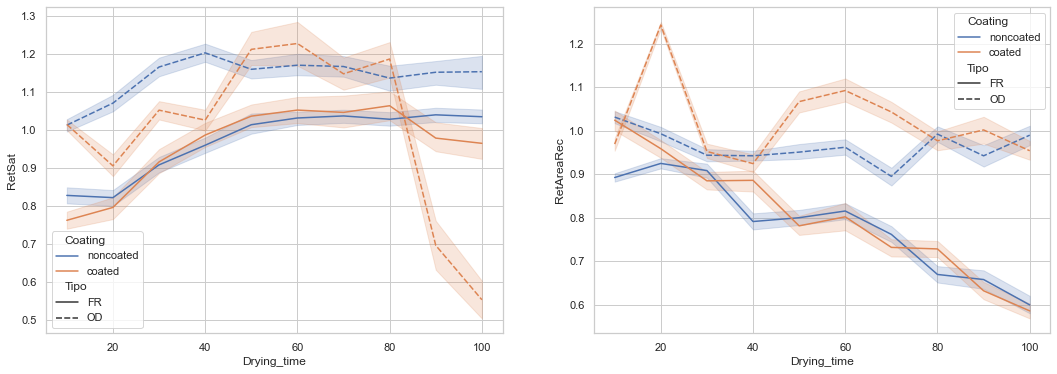

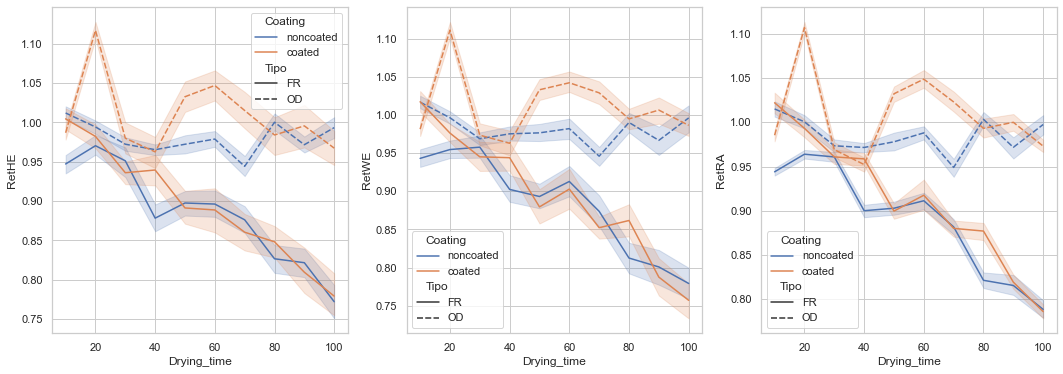

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.lineplot(x="Drying_time", y="RetAreaHue",
             hue="Coating", style="Tipo",
             data=df_, ax=axes[0])
sns.lineplot(x="Drying_time", y="RetBrig",
             hue="Coating", style="Tipo",
             data=df_, ax=axes[1])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.lineplot(x="Drying_time", y="RetSat",
             hue="Coating", style="Tipo",
             data=df_, ax=axes[0])
sns.lineplot(x="Drying_time", y="RetAreaRec",
             hue="Coating", style="Tipo",
             data=df_, ax=axes[1])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
sns.lineplot(x="Drying_time", y="RetHE",
             hue="Coating", style="Tipo",
             data=df_, ax=axes[0])
sns.lineplot(x="Drying_time", y="RetWE",
             hue="Coating", style="Tipo",
             data=df_, ax=axes[1])
sns.lineplot(x="Drying_time", y="RetRA",
             hue="Coating", style="Tipo",
             data=df_, ax=axes[2])


### TRATAMIENTO DE OUTLIERS

In [34]:
def treat_outliers(dataframe, col, **kwargs):
    """
    Treat outliers considering interquartile range.
    """     
    # Get keyword arguments
    column_action = kwargs.pop('column_action', 'remove')

    q1 = dataframe[col].quantile(0.25)
    q3 = dataframe[col].quantile(0.75)
    iqr = q3 - q1
    outlier_threshold = q3 + (iqr *1.5)
    if column_action == 'remove':
        dataframe = dataframe[dataframe[col] < outlier_threshold]
    
    return dataframe

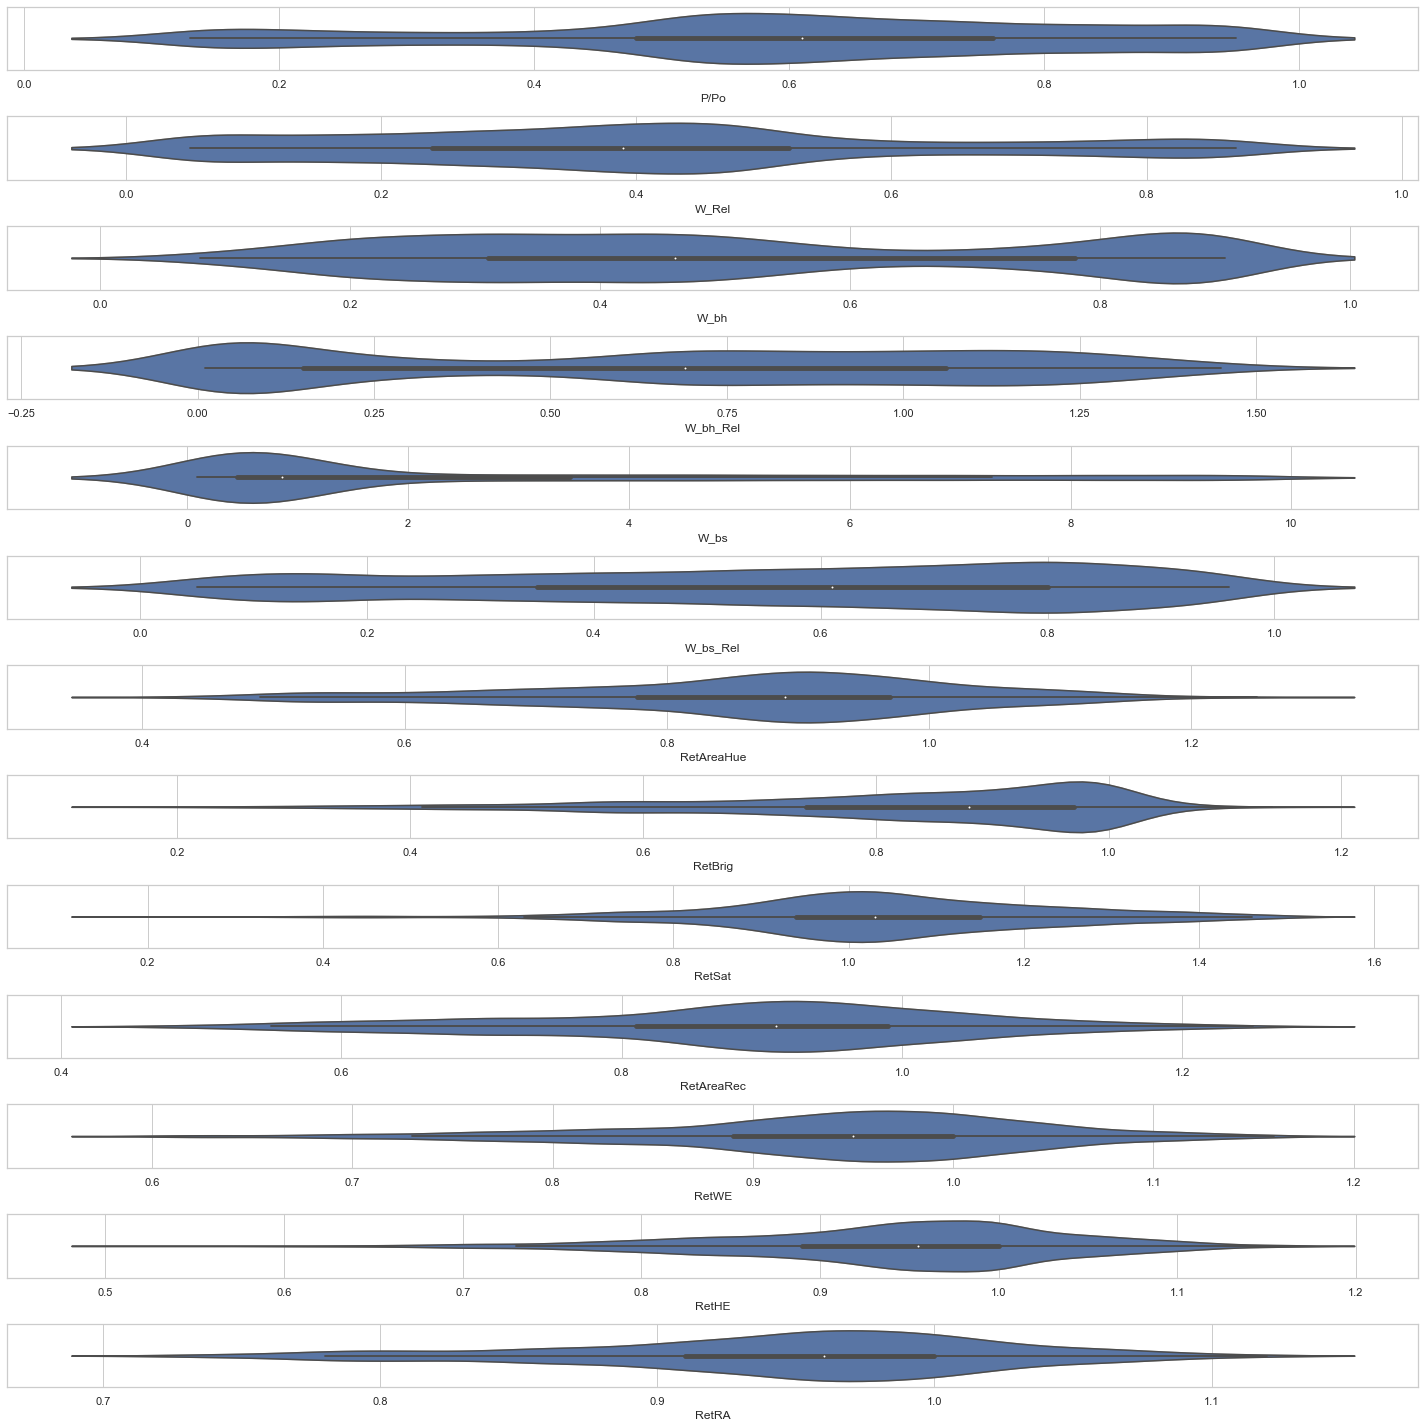

In [35]:
fig, axes = plt.subplots(nrows = 13, ncols=1, figsize = (20,20))
sns.set_style("whitegrid")
cols = ['P/Po', 'W_Rel', 'W_bh', 'W_bh_Rel', 'W_bs', 'W_bs_Rel', 'RetAreaHue', 'RetBrig', 'RetSat',
       'RetAreaRec', 'RetWE', 'RetHE', 'RetRA']
ir=0
for col in cols:
    ax = sns.violinplot(x=col, data=df_, ax=axes[ir])
    plt.setp(ax.collections, alpha=.5)
    df = treat_outliers(df_, col)
    sns.violinplot(x=col, data=df_, ax=axes[ir])
    ir += 1

fig.tight_layout()

In [36]:
df.shape

(2676, 18)

In [37]:
print("Cantidad de columnas: ", len(df.columns))

Cantidad de columnas:  18


In [38]:
df.columns

Index(['Tipo', 'Coating', 'Drying_time', 'P/Po', 'W_Rel', 'W_bh', 'W_bh_Rel',
       'W_bs', 'W_bs_Rel', 'ID_time', 'RetAreaHue', 'RetBrig', 'RetSat',
       'RetAreaRec', 'RetWE', 'RetHE', 'RetRA', 'ID'],
      dtype='object')

### CORRELATION MATRIX

                P/Po     W_Rel      W_bh  W_bh_Rel      W_bs  W_bs_Rel  \
P/Po        1.000000 -0.999973  0.200118 -0.020450  0.326089 -0.883882   
W_Rel      -0.999973  1.000000 -0.200807  0.021161 -0.327101  0.884119   
W_bh        0.200118 -0.200807  1.000000 -0.976187  0.880987 -0.591203   
W_bh_Rel   -0.020450  0.021161 -0.976187  1.000000 -0.827901  0.459411   
W_bs        0.326089 -0.327101  0.880987 -0.827901  1.000000 -0.598840   
W_bs_Rel   -0.883882  0.884119 -0.591203  0.459411 -0.598840  1.000000   
RetAreaHue  0.717525 -0.717664 -0.176276  0.332549 -0.010413 -0.456897   
RetBrig     0.563539 -0.564116  0.434060 -0.332409  0.450567 -0.627261   
RetSat     -0.078342  0.079241 -0.354170  0.363178 -0.444727  0.222960   
RetAreaRec  0.648424 -0.648501 -0.231487  0.377420 -0.076710 -0.375895   
RetWE       0.564653 -0.564728 -0.180996  0.311231 -0.048149 -0.331102   
RetHE       0.557858 -0.557913 -0.188907  0.315448 -0.056258 -0.325988   
RetRA       0.667558 -0.667652 -0.2007

<AxesSubplot:>

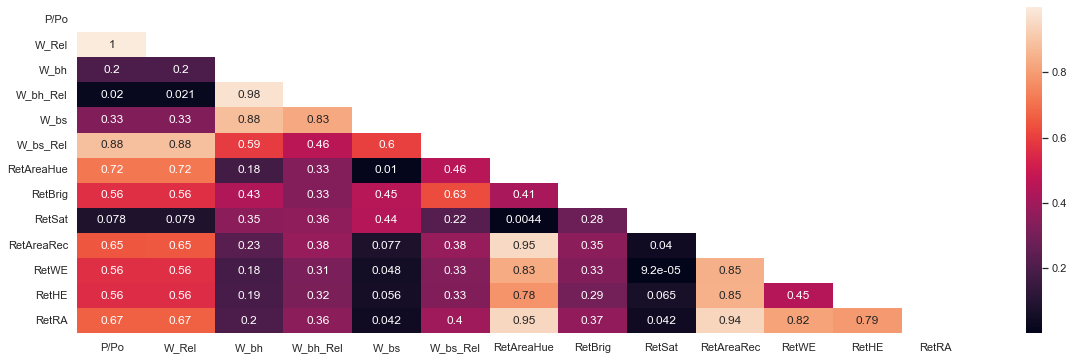

In [39]:
"""CORRELATION MATRIZ"""

df_= df.drop(['Tipo', 'Coating', 'Drying_time'], axis=1)

print(df_.corr())


"""CORRELATION MATRIX (triangle)"""
plt.figure(figsize=(20,6))
corr = df_.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
sns.heatmap(np.abs(corr), annot=True, mask=matrix)

### ESCALADO

In [40]:
features = [
        'P/Po', 'W_Rel', 'W_bh', 'W_bh_Rel', 'W_bs', 'W_bs_Rel', 
       'RetAreaHue', 'RetBrig', 'RetSat',
       'RetAreaRec', 'RetWE', 'RetHE', 'RetRA']
sample = ['ID','ID_time','Drying_time', 'Tipo', 'Coating']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:, sample].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
print(x)

[[ 1.56603544 -1.56862237  1.55796429 ... -0.33407693 -0.65390094
  -0.49939064]
 [ 1.56603544 -1.56862237  1.55796429 ...  0.28077167 -0.23159156
  -0.23730604]
 [ 1.56603544 -1.56862237  1.55796429 ...  0.28077167  0.50744985
   0.41790544]
 ...
 [-0.6543734   0.65364109 -1.72760932 ... -0.02665263  1.35206861
   0.28686315]
 [-0.6543734   0.65364109 -1.72760932 ...  0.79314551  0.19071782
   0.28686315]
 [-0.6543734   0.65364109 -1.72760932 ...  0.07582214  0.40187251
  -0.23730604]]


In [41]:
x.shape

(2676, 13)

In [42]:
y.shape

(2676, 5)

In [43]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', "principal component 3"])

print(principalComponents)

# ##Suma de varianza explicada por el n_components elegido
np.cumsum(pca.explained_variance_ratio_)

[[-1.42170092 -4.34772942 -0.56827415]
 [-2.06280319 -4.02859519 -0.34580782]
 [-2.81585242 -3.79723085  0.47291284]
 ...
 [ 0.13080241  2.57095156  2.24243261]
 [ 0.2820481   2.68211793  2.37853517]
 [ 0.61607885  2.23237057  2.22390962]]


array([0.47714254, 0.78040303, 0.85053633])

In [44]:
principalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   principal component 1  2676 non-null   float64
 1   principal component 2  2676 non-null   float64
 2   principal component 3  2676 non-null   float64
dtypes: float64(3)
memory usage: 62.8 KB


In [45]:
principalDf.shape

(2676, 3)

In [46]:
Id = pd.DataFrame(data = y, 
                  columns = ['ID','ID_time', 'Drying_time', 'Tipo', 'Coating'])

In [47]:
Id

,ID,ID_time,Drying_time,Tipo,Coating
0,FR_noncoated,FR_noncoated_10,10,FR,noncoated
1,FR_noncoated,FR_noncoated_10,10,FR,noncoated
2,FR_noncoated,FR_noncoated_10,10,FR,noncoated
3,FR_noncoated,FR_noncoated_10,10,FR,noncoated
4,FR_noncoated,FR_noncoated_10,10,FR,noncoated
...,...,...,...,...,...
2671,OD_coated,OD_coated_100,100,OD,coated
2672,OD_coated,OD_coated_100,100,OD,coated
2673,OD_coated,OD_coated_100,100,OD,coated
2674,OD_coated,OD_coated_100,100,OD,coated


In [48]:
finalDf = pd.concat([principalDf, Id], axis = 1)
finalDf.head()
finalDf.shape

(2676, 8)

In [49]:
finalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   principal component 1  2676 non-null   float64
 1   principal component 2  2676 non-null   float64
 2   principal component 3  2676 non-null   float64
 3   ID                     2676 non-null   object 
 4   ID_time                2676 non-null   object 
 5   Drying_time            2676 non-null   object 
 6   Tipo                   2676 non-null   object 
 7   Coating                2676 non-null   object 
dtypes: float64(3), object(5)
memory usage: 167.4+ KB


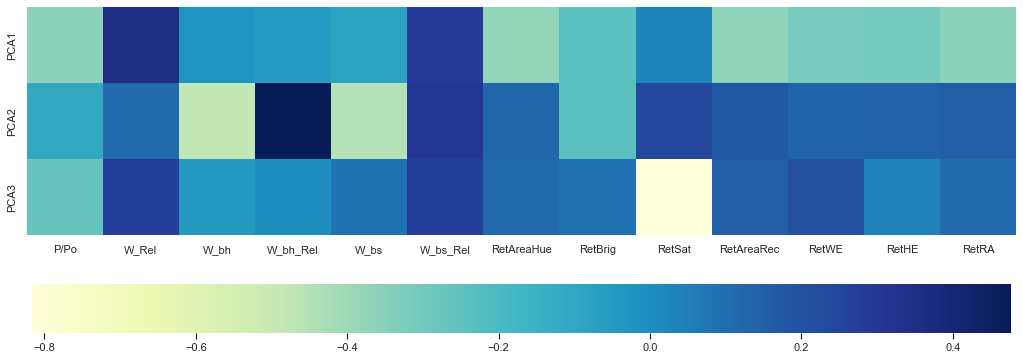

In [50]:
##############
###HEAT_MAP###
##############

plt.figure(figsize=(20,6))
ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(features),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

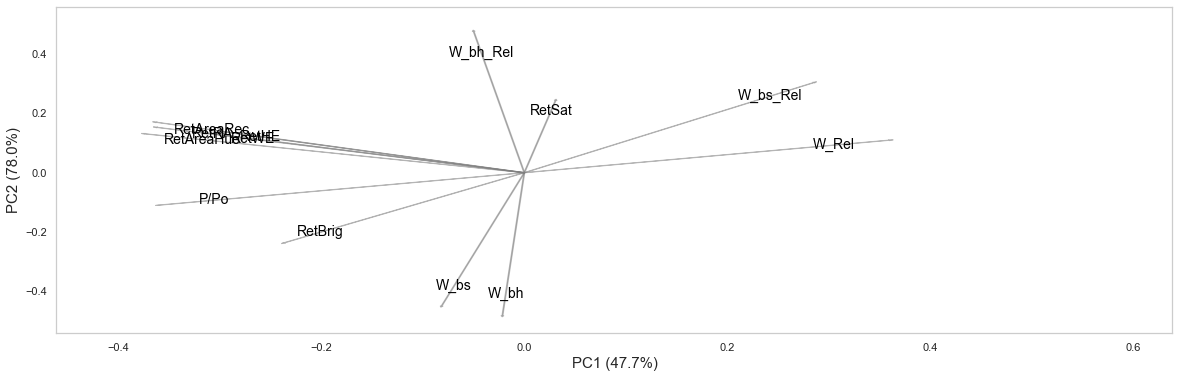

In [51]:
##############
####BIPLOT####
##############

plt.rcParams.update({'font.size': 14})
labels = features
txt = df["Tipo"]

def myplot(score,coeff,labels= labels):
    plt.figure(figsize=(20,6))
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs* scalex,ys * scaley, color = "white", s=5)
        # plt.scatter(xs*0.1,ys*0.1, color = "black", s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'gray',alpha = 0.5)
        # if labels is None:
        #     plt.text(coeff[i,0]* 0.85, coeff[i,1] * 0.85, "Var"+str(i+1), color = 'gray', ha = 'center', va = 'center')
        # else:
        plt.text(coeff[i,0]* 0.85, coeff[i,1] * 0.85, labels[i], color = 'black', ha = 'center', va = 'center') 
    plt.xlabel("PC1 (47.7%)", fontsize = 15)
    plt.ylabel("PC2 (78.0%)", fontsize = 15)
    plt.grid()

myplot(principalComponents[:,0:2],np.transpose(pca.components_[0:2, :]),labels)
plt.show()

In [52]:
print(principalComponents)
print("----------------------------------------------------------")
print(np.transpose(pca.components_[0:2, :])) #coordenadas vectores

[[-1.42170092 -4.34772942 -0.56827415]
 [-2.06280319 -4.02859519 -0.34580782]
 [-2.81585242 -3.79723085  0.47291284]
 ...
 [ 0.13080241  2.57095156  2.24243261]
 [ 0.2820481   2.68211793  2.37853517]
 [ 0.61607885  2.23237057  2.22390962]]
----------------------------------------------------------
[[-0.35930449 -0.10912959]
 [ 0.35937675  0.10950721]
 [-0.02155041 -0.48174868]
 [-0.04991975  0.47651481]
 [-0.08148259 -0.44936427]
 [ 0.28503509  0.30360398]
 [-0.37351793  0.13094341]
 [-0.23639764 -0.23615146]
 [ 0.03081645  0.24353366]
 [-0.36239897  0.16992912]
 [-0.31416259  0.13475758]
 [-0.30613502  0.14237118]
 [-0.36167511  0.15270799]]


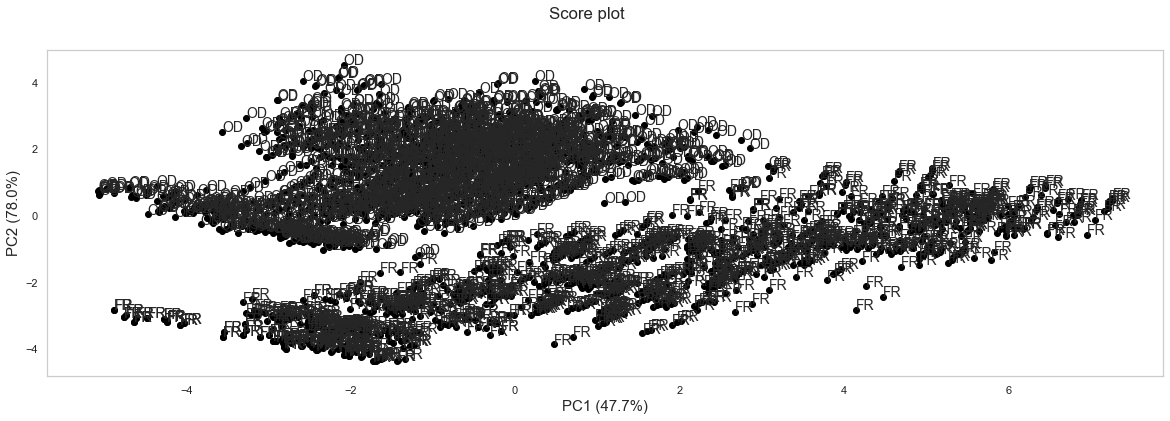

In [53]:
#Scatter plot (Score plot)
PC1 = principalDf["principal component 1"]
x = principalDf.loc[:, "principal component 1"].values
PC2 = principalDf["principal component 2"]
y = principalDf.loc[:, "principal component 2"].values
PC3 = principalDf["principal component 3"]
z = principalDf.loc[:, "principal component 3"].values

fig, ax = plt.subplots(1, figsize=(20, 6))
fig.suptitle('Score plot')
ax.scatter(x, y, color="black")
ax.set_xlabel('PC1 (47.7%)', fontsize = 15)
ax.set_ylabel('PC2 (78.0%)', fontsize = 15)
plt.grid()
for i, txt in enumerate(txt):
    ax.annotate(txt, (x[i], y[i]))

In [54]:
finalDf.to_csv("finalDf_img_dry.csv", header=True, index=False)

## CLUSTERING

In [55]:
df = pd.read_csv("finalDf_img_dry.csv")

In [56]:
df.columns

Index(['principal component 1', 'principal component 2',
       'principal component 3', 'ID', 'ID_time', 'Drying_time', 'Tipo',
       'Coating'],
      dtype='object')

In [57]:
### Selección de features para df con PCA:
from sklearn.preprocessing import StandardScaler
features = [
        'principal component 1',
        'principal component 2',
        'principal component 3',
           ]
sample = [  
            "ID",
            "ID_time",
            "Tipo",
            "Coating",
            "Drying_time"
            ]

In [58]:
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:, sample].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
print(x)

[[-0.5708375  -2.18969142 -0.5951468 ]
 [-0.82825115 -2.02896258 -0.36216044]
 [-1.13061344 -1.9124382   0.49527602]
 ...
 [ 0.05251943  1.29483462  2.34847313]
 [ 0.11324719  1.35082247  2.49101173]
 [ 0.24736631  1.12431161  2.32907423]]


In [59]:
x.shape

(2676, 3)

In [60]:
y.shape

(2676, 5)

k:  2 - Silhouette_coefficients:  0.332  ±  0.122
k:  3 - Silhouette_coefficients:  0.367  ±  0.164
k:  4 - Silhouette_coefficients:  0.388  ±  0.171
k:  5 - Silhouette_coefficients:  0.363  ±  0.176
k:  6 - Silhouette_coefficients:  0.359  ±  0.168
k:  7 - Silhouette_coefficients:  0.352  ±  0.168
k:  8 - Silhouette_coefficients:  0.342  ±  0.173
k:  9 - Silhouette_coefficients:  0.335  ±  0.172
k:  10 - Silhouette_coefficients:  0.326  ±  0.17


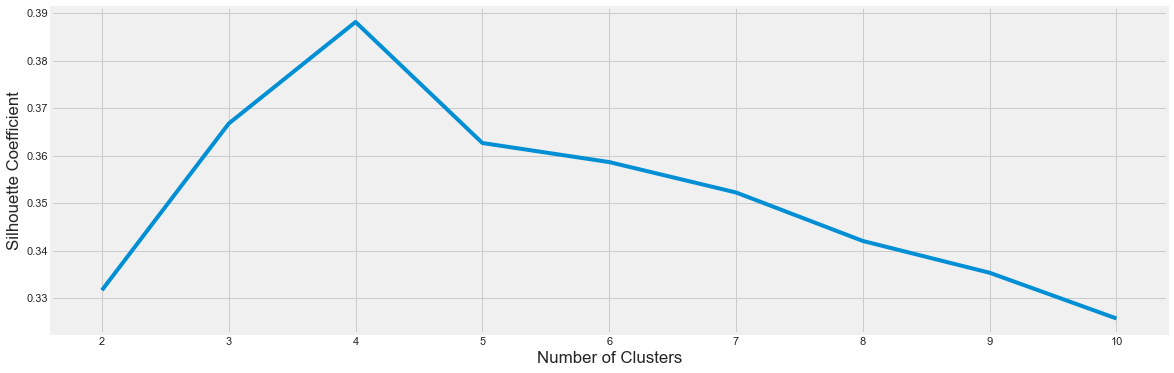

In [61]:
###CÁLCULO DE SILHOUETTE_COEFFICIENTS###
silhouette_coefficients = []
silhouette_values = []

kmeans_kwargs = {
    #"init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', **kmeans_kwargs)
    kmeans.fit(x)
    score = silhouette_score(x, kmeans.labels_)
    silhouette_coefficients.append(score)
    i_score = silhouette_samples(x, kmeans.labels_)
    silhouette_values.append(i_score)
    print("k: ", k, 
          "- Silhouette_coefficients: ", round(score, 3),
          " ± ", round(i_score.std(), 3))
    
plt.figure(figsize=(20,6))
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

k:  1 - SSE:  8028.0
k:  2 - SSE:  5682.06
k:  3 - SSE:  4179.24
k:  4 - SSE:  2885.23
k:  5 - SSE:  2418.0
k:  6 - SSE:  2071.5
k:  7 - SSE:  1742.37
k:  8 - SSE:  1567.78
k:  9 - SSE:  1437.59
k:  10 - SSE:  1347.35


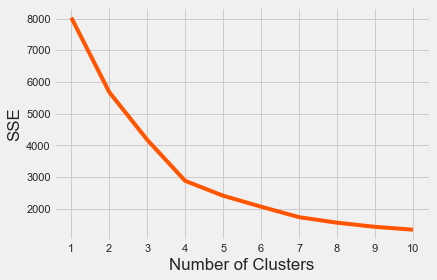

4

In [62]:
from kneed import KneeLocator

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', **kmeans_kwargs)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
    print("k: ", k, 
          "- SSE: ", round(kmeans.inertia_, 2))
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse, color='#ff5500')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

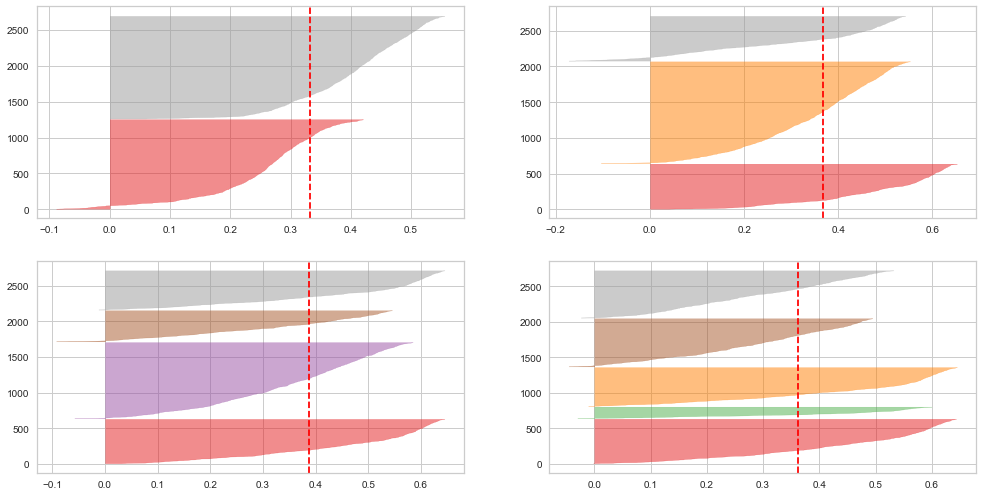

In [63]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.style import set_palette
set_palette('flatui')

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2,3,4,5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, 
                                      #colors='yellowbrick', 
                                      ax=ax[q-1][mod])
    visualizer.fit(x)

### ENSAYO #1


### K=4 --> TARGET: ID

In [64]:
from sklearn.cluster import KMeans
n = 4
k_means = KMeans(n_clusters=n, init='k-means++')
k_means.fit(x)

KMeans(n_clusters=4)

In [65]:
df["ID"].value_counts()

OD_noncoated    1075
FR_noncoated     723
FR_coated        462
OD_coated        416
Name: ID, dtype: int64

In [66]:
#Balance de clases?

In [67]:
###POR CATEGORÍA DE TIEMPO###
True_labels_ID=df.ID
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
True_labels_encoded_ID=le.fit_transform(True_labels_ID)
print(True_labels_encoded_ID)
True_labels_encoded_ID.shape

[1 1 1 ... 2 2 2]


(2676,)

In [68]:
centroides_ID = k_means.cluster_centers_
etiquetas_ID = k_means.labels_
labels_ID = True_labels_encoded_ID
print("Etiquetas:\n", etiquetas_ID)
print("..................................")
print("Centroides:\n", centroides_ID)
print("..................................")
print("True labels:\n", labels_ID)

Etiquetas:
 [1 1 1 ... 0 0 0]
..................................
Centroides:
 [[-0.44398586  1.03409001  1.24039165]
 [-0.37610111 -1.40864283  0.20438035]
 [-0.41260833  0.52685367 -0.75879099]
 [ 1.58684225 -0.26496679  0.1825946 ]]
..................................
True labels:
 [1 1 1 ... 2 2 2]


In [69]:
df["True_labels_ID"] = labels_ID
df["k-Means_labels_ID"] = etiquetas_ID
df.head()

,principal component 1,principal component 2,principal component 3,ID,ID_time,Drying_time,Tipo,Coating,True_labels_ID,k-Means_labels_ID
0,-1.421701,-4.347729,-0.568274,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1
1,-2.062803,-4.028595,-0.345808,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1
2,-2.815852,-3.797231,0.472913,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1
3,-2.708706,-3.794129,0.178710,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1
4,-1.857477,-4.214011,0.179008,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1


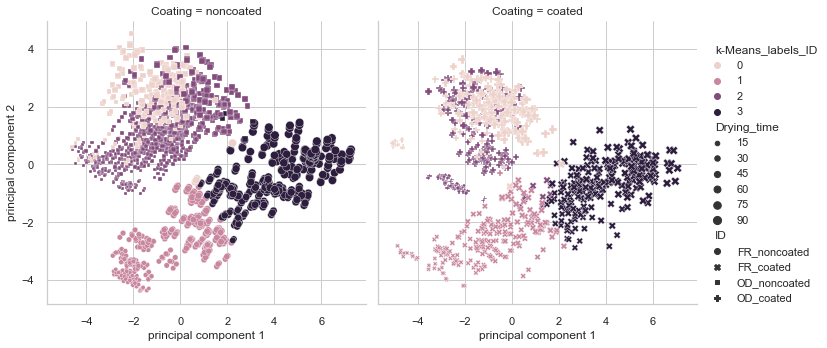

In [70]:
import seaborn as sns

# Apply the default theme
sns.set_theme(style="whitegrid")

# Create a visualization
sns.relplot(
    data=df,
    x="principal component 1", y="principal component 2", col="Coating",
    hue="k-Means_labels_ID", style="ID", 
    size="Drying_time",
)

### ENSAYO #2

### K=2 --> TARGET: TIPO

In [71]:
from sklearn.cluster import KMeans
n = 2
k_means = KMeans(n_clusters=n, init='k-means++')
k_means.fit(x)

KMeans(n_clusters=2)

In [72]:
df["Tipo"].value_counts()

OD    1491
FR    1185
Name: Tipo, dtype: int64

In [73]:
###POR CATEGORÍA DE TIEMPO###
True_labels_Tipo=df.Tipo
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
True_labels_encoded_Tipo=le.fit_transform(True_labels_Tipo)
print(True_labels_encoded_Tipo)
True_labels_encoded_Tipo.shape

[0 0 0 ... 1 1 1]


(2676,)

In [74]:
centroides_Tipo = k_means.cluster_centers_
etiquetas_Tipo = k_means.labels_
labels_Tipo = True_labels_encoded_Tipo
print("Etiquetas:\n", etiquetas_Tipo)
print("..................................")
print("Centroides:\n", centroides_Tipo)
print("..................................")
print("True labels:\n", labels_Tipo)

Etiquetas:
 [0 0 0 ... 1 1 1]
..................................
Centroides:
 [[ 0.5129817  -0.80123859  0.32736231]
 [-0.44429796  0.69395979 -0.28353137]]
..................................
True labels:
 [0 0 0 ... 1 1 1]


In [75]:
df["True_labels_Tipo"] = labels_Tipo
df["k-Means_labels_Tipo"] = etiquetas_Tipo
df.head()

,principal component 1,principal component 2,principal component 3,ID,ID_time,Drying_time,Tipo,Coating,True_labels_ID,k-Means_labels_ID,True_labels_Tipo,k-Means_labels_Tipo
0,-1.421701,-4.347729,-0.568274,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0
1,-2.062803,-4.028595,-0.345808,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0
2,-2.815852,-3.797231,0.472913,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0
3,-2.708706,-3.794129,0.178710,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0
4,-1.857477,-4.214011,0.179008,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0


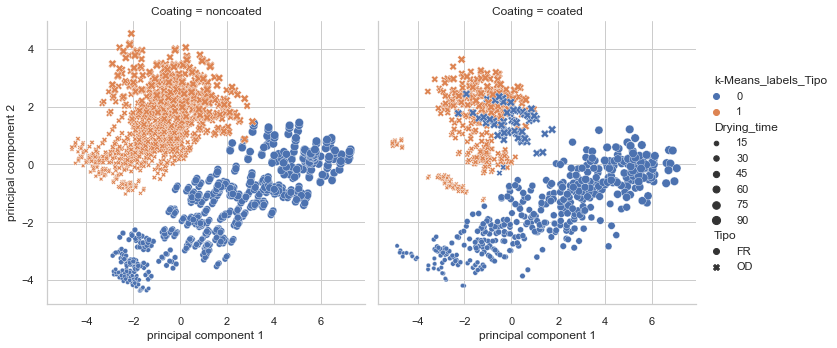

In [76]:
import seaborn as sns

# Apply the default theme
sns.set_theme(style="whitegrid")

# Create a visualization
sns.relplot(
    data=df,
    x="principal component 1", y="principal component 2", col="Coating",
    hue="k-Means_labels_Tipo", style="Tipo", 
    size="Drying_time",
)

### K=10 --> TARGET: Drying_time

In [77]:
from sklearn.cluster import KMeans
n = 10
k_means = KMeans(n_clusters=n, init='k-means++')
k_means.fit(x)

KMeans(n_clusters=10)

In [78]:
df["Drying_time"].value_counts()

10     292
50     282
40     279
30     276
70     276
90     271
80     270
60     262
20     238
100    230
Name: Drying_time, dtype: int64

In [79]:
###POR CATEGORÍA DE TIEMPO###
True_labels_Time=df.Drying_time
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
True_labels_encoded_Time=le.fit_transform(True_labels_Time)
print(True_labels_encoded_Time)
True_labels_encoded_Time.shape

[0 0 0 ... 9 9 9]


(2676,)

In [80]:
centroides_Time = k_means.cluster_centers_
etiquetas_Time = k_means.labels_
labels_Time = True_labels_encoded_Time
print("Etiquetas:\n", etiquetas_Time)
print("..................................")
print("Centroides:\n", centroides_Time)
print("..................................")
print("True labels:\n", labels_Time)

Etiquetas:
 [3 3 3 ... 4 4 4]
..................................
Centroides:
 [[ 0.72946003 -0.49575518  0.6853495 ]
 [-0.79418763  0.04361261 -0.83664416]
 [-0.13852768  1.05612396 -0.33673019]
 [-0.81061499 -1.62682526  0.33766673]
 [-0.13012944  0.90461921  3.05549199]
 [ 1.99570756 -0.08862917  0.11775017]
 [ 0.49204095 -1.09576562 -0.30920321]
 [ 0.16648836  0.66204921 -1.64853911]
 [-0.44863298  1.22793513  0.96368982]
 [-1.10378946  0.30415881  0.20993482]]
..................................
True labels:
 [0 0 0 ... 9 9 9]


In [81]:
df["True_labels_Time"] = labels_Time
df["k-Means_labels_Time"] = etiquetas_Time
df.head(20)

,principal component 1,principal component 2,principal component 3,ID,ID_time,Drying_time,Tipo,Coating,True_labels_ID,k-Means_labels_ID,True_labels_Tipo,k-Means_labels_Tipo,True_labels_Time,k-Means_labels_Time
0,-1.421701,-4.347729,-0.568274,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3
1,-2.062803,-4.028595,-0.345808,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3
2,-2.815852,-3.797231,0.472913,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3
3,-2.708706,-3.794129,0.178710,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3
4,-1.857477,-4.214011,0.179008,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3
5,-1.711561,-4.360404,0.243634,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3
6,-2.209116,-3.730199,-1.063878,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3
7,-2.366295,-3.686068,-0.725177,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3
8,-1.929959,-3.909039,-0.847793,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3
9,-2.223629,-3.793169,-0.708131,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3


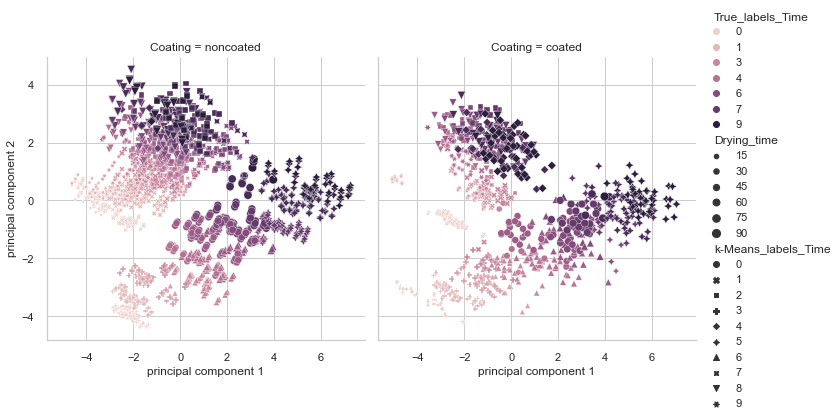

In [82]:
import seaborn as sns

# Apply the default theme
sns.set_theme(style="whitegrid")

# Create a visualization
sns.relplot(
    data=df,
    x="principal component 1", y="principal component 2", col="Coating",
    hue="True_labels_Time", style="k-Means_labels_Time", 
    size="Drying_time",
)

### K=2 --> TARGET: TIME THRESHOLD

Considerando cambios >50 min y <60 min

In [83]:
df.head()

,principal component 1,principal component 2,principal component 3,ID,ID_time,Drying_time,Tipo,Coating,True_labels_ID,k-Means_labels_ID,True_labels_Tipo,k-Means_labels_Tipo,True_labels_Time,k-Means_labels_Time
0,-1.421701,-4.347729,-0.568274,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3
1,-2.062803,-4.028595,-0.345808,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3
2,-2.815852,-3.797231,0.472913,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3
3,-2.708706,-3.794129,0.178710,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3
4,-1.857477,-4.214011,0.179008,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3


In [84]:
df["Time_threshold"] = ["long" if t >50 else "short" for t in df["Drying_time"]] 

In [85]:
df.columns

Index(['principal component 1', 'principal component 2',
       'principal component 3', 'ID', 'ID_time', 'Drying_time', 'Tipo',
       'Coating', 'True_labels_ID', 'k-Means_labels_ID', 'True_labels_Tipo',
       'k-Means_labels_Tipo', 'True_labels_Time', 'k-Means_labels_Time',
       'Time_threshold'],
      dtype='object')

In [86]:
df.Time_threshold.value_counts()

short    1367
long     1309
Name: Time_threshold, dtype: int64

In [87]:
from sklearn.cluster import KMeans
n = 2
k_means = KMeans(n_clusters=n)
k_means.fit(x)

KMeans(n_clusters=2)

In [88]:
df["Time_threshold"].value_counts()

short    1367
long     1309
Name: Time_threshold, dtype: int64

In [89]:
###POR CATEGORÍA DE TIEMPO###
True_labels_TT=df.Time_threshold
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
True_labels_encoded_TT=le.fit_transform(True_labels_TT)
print(True_labels_encoded_TT)
True_labels_encoded_TT.shape

[1 1 1 ... 0 0 0]


(2676,)

In [90]:
centroides_TT = k_means.cluster_centers_
etiquetas_TT = k_means.labels_
labels_TT = True_labels_encoded_TT
print("Etiquetas:\n", etiquetas_TT)
print("..................................")
print("Centroides:\n", centroides_TT)
print("..................................")
print("True labels:\n", labels_TT)

Etiquetas:
 [0 0 0 ... 1 1 1]
..................................
Centroides:
 [[ 0.51010219 -0.79358863  0.33855866]
 [-0.44513466  0.69251576 -0.29543922]]
..................................
True labels:
 [1 1 1 ... 0 0 0]


In [91]:
df["True_labels_TT"] = labels_TT
df["k-Means_labels_TT"] = etiquetas_TT
df.head()

,principal component 1,principal component 2,principal component 3,ID,ID_time,Drying_time,Tipo,Coating,True_labels_ID,k-Means_labels_ID,True_labels_Tipo,k-Means_labels_Tipo,True_labels_Time,k-Means_labels_Time,Time_threshold,True_labels_TT,k-Means_labels_TT
0,-1.421701,-4.347729,-0.568274,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,short,1,0
1,-2.062803,-4.028595,-0.345808,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,short,1,0
2,-2.815852,-3.797231,0.472913,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,short,1,0
3,-2.708706,-3.794129,0.178710,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,short,1,0
4,-1.857477,-4.214011,0.179008,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,short,1,0


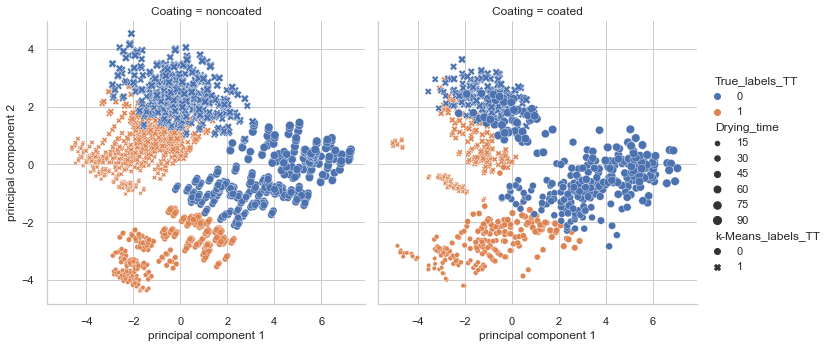

In [92]:
import seaborn as sns

# Apply the default theme
sns.set_theme(style="whitegrid")

# Create a visualization
sns.relplot(
    data=df,
    x="principal component 1", y="principal component 2", col="Coating",
    hue="True_labels_TT", style="k-Means_labels_TT", 
    size="Drying_time",
)

### Reporte de métricas

In [93]:
from sklearn import metrics
print("__________________________________________________________")
print("ID labels (k=4)")
print("+++++++++++")
print("Rand Score: ", metrics.rand_score(labels_ID, etiquetas_ID))
print("----------------------------------------------------------")
print("Adjusted rand score: ", metrics.adjusted_rand_score(labels_ID, etiquetas_ID))
print("----------------------------------------------------------")
print("Adjusted mutual information score: ", metrics.adjusted_mutual_info_score(labels_ID, etiquetas_ID))
print("----------------------------------------------------------")
print("Homogeneity: ", metrics.homogeneity_score(labels_ID, etiquetas_ID))
print("Completeness: ", metrics.completeness_score(labels_ID, etiquetas_ID))
print("V_measure_score: ", metrics.v_measure_score(labels_ID, etiquetas_ID))
print("__________________________________________________________")
print("Time labels (k=10)")
print("+++++++++++")
print("Rand Score: ", metrics.rand_score(labels_Time, etiquetas_Time))
print("----------------------------------------------------------")
print("Adjusted rand score: ", metrics.adjusted_rand_score(labels_Time, etiquetas_Time))
print("----------------------------------------------------------")
print("Adjusted mutual information score: ", metrics.adjusted_mutual_info_score(labels_Time, etiquetas_Time))
print("----------------------------------------------------------")
print("Homogeneity: ", metrics.homogeneity_score(labels_Time, etiquetas_Time))
print("Completeness: ", metrics.completeness_score(labels_Time, etiquetas_Time))
print("V_measure_score: ", metrics.v_measure_score(labels_Time, etiquetas_Time))
print("__________________________________________________________")
print("Treatment labels (k=2)")
print("++++++++++++++++")
print("Rand Score: ", metrics.rand_score(labels_Tipo, etiquetas_Tipo))
print("----------------------------------------------------------")
print("Adjusted rand score: ", metrics.adjusted_rand_score(labels_Tipo, etiquetas_Tipo))
print("----------------------------------------------------------")
print("Adjusted mutual information score: ", metrics.adjusted_mutual_info_score(labels_Tipo, etiquetas_Tipo))
print("----------------------------------------------------------")
print("Homogeneity: ", metrics.homogeneity_score(labels_Tipo, etiquetas_Tipo))
print("Completeness: ", metrics.completeness_score(labels_Tipo, etiquetas_Tipo))
print("V_measure_score: ", metrics.v_measure_score(labels_Tipo, etiquetas_Tipo))
print("__________________________________________________________")
print("Time threshold (k=2)")
print("++++++++++++++++")
print("Rand Score: ", metrics.rand_score(labels_TT, etiquetas_TT))
print("----------------------------------------------------------")
print("Adjusted rand score: ", metrics.adjusted_rand_score(labels_TT, etiquetas_TT))
print("----------------------------------------------------------")
print("Adjusted mutual information score: ", metrics.adjusted_mutual_info_score(labels_TT, etiquetas_TT))
print("----------------------------------------------------------")
print("Homogeneity: ", metrics.homogeneity_score(labels_TT, etiquetas_TT))
print("Completeness: ", metrics.completeness_score(labels_TT, etiquetas_TT))
print("V_measure_score: ", metrics.v_measure_score(labels_TT, etiquetas_TT))
print("__________________________________________________________")

__________________________________________________________
ID labels (k=4)
+++++++++++
Rand Score:  0.7603939482838104
----------------------------------------------------------
Adjusted rand score:  0.41008476184196185
----------------------------------------------------------
Adjusted mutual information score:  0.49072778311286774
----------------------------------------------------------
Homogeneity:  0.49512821497512344
Completeness:  0.4876814237723688
V_measure_score:  0.4913766070439972
__________________________________________________________
Time labels (k=10)
+++++++++++
Rand Score:  0.8409898998365534
----------------------------------------------------------
Adjusted rand score:  0.1576326758365067
----------------------------------------------------------
Adjusted mutual information score:  0.3263428855864418
----------------------------------------------------------
Homogeneity:  0.326589267805517
Completeness:  0.3352791598606233
V_measure_score:  0.33087716758280883
__

## Filtro FRESH SAMPLES . 
### K=2 --> TARGET: TIME THRESHOLD

Considerando cambios >50 min y <50 min

In [94]:
df.head()

,principal component 1,principal component 2,principal component 3,ID,ID_time,Drying_time,Tipo,Coating,True_labels_ID,k-Means_labels_ID,True_labels_Tipo,k-Means_labels_Tipo,True_labels_Time,k-Means_labels_Time,Time_threshold,True_labels_TT,k-Means_labels_TT
0,-1.421701,-4.347729,-0.568274,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,short,1,0
1,-2.062803,-4.028595,-0.345808,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,short,1,0
2,-2.815852,-3.797231,0.472913,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,short,1,0
3,-2.708706,-3.794129,0.178710,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,short,1,0
4,-1.857477,-4.214011,0.179008,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,short,1,0


In [95]:
df.shape

(2676, 17)

In [96]:
df["Time_threshold"] = ["long" if t >50 else "short" for t in df["Drying_time"]] 

In [97]:
df.columns

Index(['principal component 1', 'principal component 2',
       'principal component 3', 'ID', 'ID_time', 'Drying_time', 'Tipo',
       'Coating', 'True_labels_ID', 'k-Means_labels_ID', 'True_labels_Tipo',
       'k-Means_labels_Tipo', 'True_labels_Time', 'k-Means_labels_Time',
       'Time_threshold', 'True_labels_TT', 'k-Means_labels_TT'],
      dtype='object')

In [98]:
df.Time_threshold.value_counts()

short    1367
long     1309
Name: Time_threshold, dtype: int64

In [99]:
df_FR = df[df["Tipo"]=="FR"]

In [100]:
df_FR["Tipo"].value_counts()

FR    1185
Name: Tipo, dtype: int64

In [101]:
df_FR.Time_threshold.value_counts()

long     594
short    591
Name: Time_threshold, dtype: int64

In [102]:
# Separating out the features
x = df_FR.loc[:, features].values
# Separating out the target
y = df_FR.loc[:, sample].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
print(x)

[[-0.96328425 -1.88499138 -1.2745871 ]
 [-1.18685791 -1.65470639 -0.8956777 ]
 [-1.44947119 -1.48775553  0.49878482]
 ...
 [ 1.47207712  1.73514845  0.09690852]
 [ 1.86860925  1.10667888 -0.05489475]
 [ 1.93171369  1.59782962 -1.21075391]]


FRESH SUBSET: 
k:  2 - Silhouette_coefficients:  0.406  ±  0.161
k:  3 - Silhouette_coefficients:  0.356  ±  0.168
k:  4 - Silhouette_coefficients:  0.33  ±  0.16
k:  5 - Silhouette_coefficients:  0.335  ±  0.162
k:  6 - Silhouette_coefficients:  0.331  ±  0.166
k:  7 - Silhouette_coefficients:  0.313  ±  0.153
k:  8 - Silhouette_coefficients:  0.313  ±  0.155
k:  9 - Silhouette_coefficients:  0.306  ±  0.158
k:  10 - Silhouette_coefficients:  0.312  ±  0.161


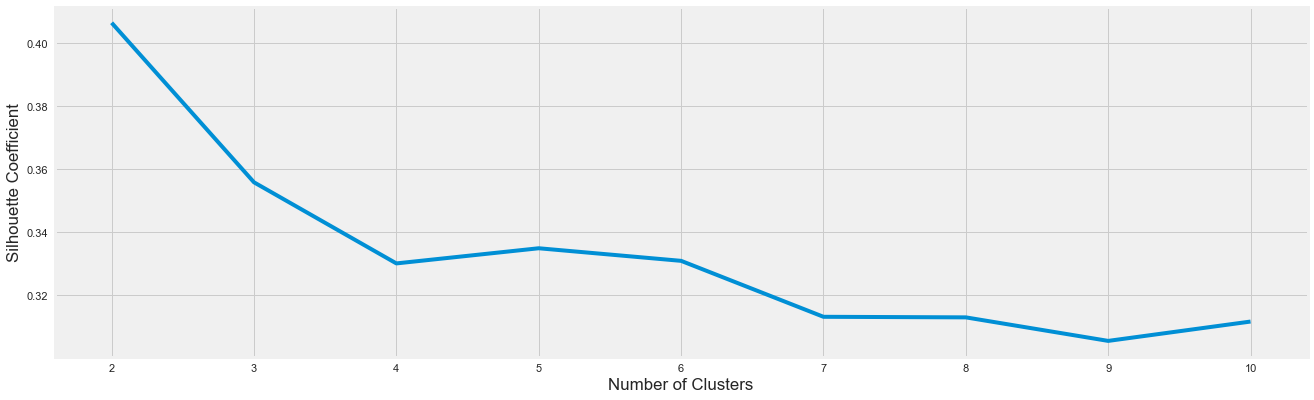

In [103]:
###CÁLCULO DE SILHOUETTE_COEFFICIENTS###
silhouette_coefficients = []
silhouette_values = []

kmeans_kwargs = {
    #"init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# Notice you start at 2 clusters for silhouette coefficient
print("FRESH SUBSET: ")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', **kmeans_kwargs)
    kmeans.fit(x)
    score = silhouette_score(x, kmeans.labels_)
    silhouette_coefficients.append(score)
    i_score = silhouette_samples(x, kmeans.labels_)
    silhouette_values.append(i_score)
    
    print("k: ", k, 
          "- Silhouette_coefficients: ", round(score, 3),
          " ± ", round(i_score.std(), 3))
    
plt.figure(figsize=(20,6))
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

C:\Users\Diez\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  "KMeans is known to have a memory leak on Windows "


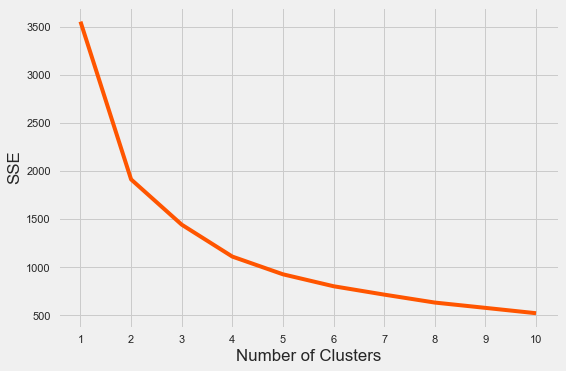

3

In [104]:
from kneed import KneeLocator

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', **kmeans_kwargs)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
   
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse, color='#ff5500')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

In [105]:
try:
    # See #1137: this allows compatibility for scikit-learn >= 0.24
    from sklearn.utils import safe_indexing
except ImportError:
    from sklearn.utils import _safe_indexing

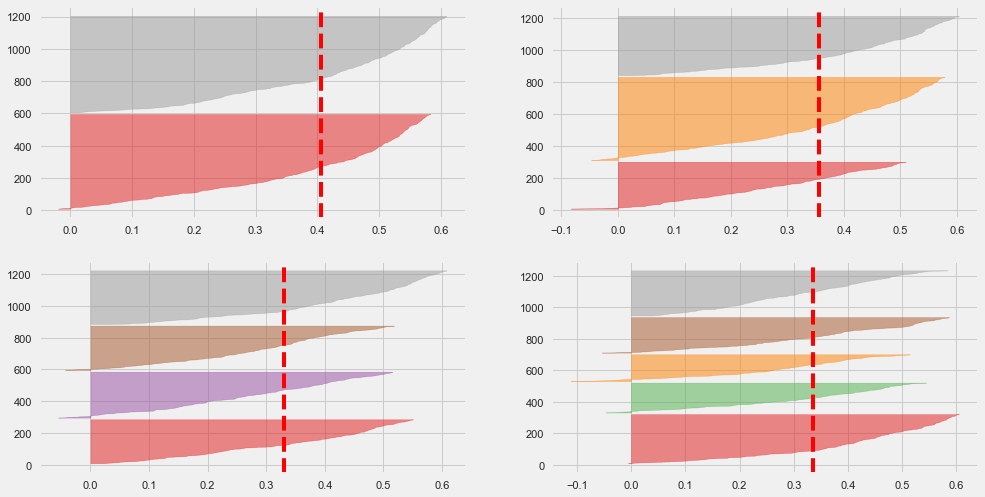

In [106]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.style import set_palette
set_palette('flatui')

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, 
                                      #colors='yellowbrick', 
                                      ax=ax[q-1][mod])
    visualizer.fit(x)

In [107]:
from sklearn.cluster import KMeans
n = 2
k_means = KMeans(n_clusters=n, init='k-means++')
k_means.fit(x)

KMeans(n_clusters=2)

In [108]:
conditionlist = [
    (df_FR['Drying_time'] >= 60) ,
    #(df_FR['Drying_time'] >= 50) & (df_FR['Drying_time'] <70),
    (df_FR['Drying_time'] <= 50)]
choicelist = ['High', 
              #'Mid', 
              'Low']
df_FR['Time_threshold'] = np.select(conditionlist, choicelist, default='Not Specified')

C:\Users\Diez\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [109]:
df_FR["Time_threshold"].value_counts()

High    594
Low     591
Name: Time_threshold, dtype: int64

In [110]:
###POR CATEGORÍA DE TIEMPO###
True_labels_TT=df_FR.Time_threshold
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
True_labels_encoded_TT=le.fit_transform(True_labels_TT)
print(True_labels_encoded_TT)
True_labels_encoded_TT.shape

[1 1 1 ... 0 0 0]


(1185,)

In [111]:
centroides_FR_TT = k_means.cluster_centers_
etiquetas_FR_TT = k_means.labels_
labels_FR_TT = True_labels_encoded_TT
print("Etiquetas:\n", etiquetas_FR_TT)
print("..................................")
print("Centroides:\n", centroides_FR_TT)
print("..................................")
print("True labels:\n", labels_FR_TT)

Etiquetas:
 [0 0 0 ... 1 1 1]
..................................
Centroides:
 [[-0.8042693  -0.84069909 -0.07127524]
 [ 0.81934079  0.85645324  0.07261089]]
..................................
True labels:
 [1 1 1 ... 0 0 0]


In [112]:
df_FR["True_labels_TT_FR"] = labels_FR_TT
df_FR["k-Means_labels_TT_FR"] = etiquetas_FR_TT
df_FR.head()

C:\Users\Diez\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Diez\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,principal component 1,principal component 2,principal component 3,ID,ID_time,Drying_time,Tipo,Coating,True_labels_ID,k-Means_labels_ID,True_labels_Tipo,k-Means_labels_Tipo,True_labels_Time,k-Means_labels_Time,Time_threshold,True_labels_TT,k-Means_labels_TT,True_labels_TT_FR,k-Means_labels_TT_FR
0,-1.421701,-4.347729,-0.568274,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,Low,1,0,1,0
1,-2.062803,-4.028595,-0.345808,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,Low,1,0,1,0
2,-2.815852,-3.797231,0.472913,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,Low,1,0,1,0
3,-2.708706,-3.794129,0.178710,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,Low,1,0,1,0
4,-1.857477,-4.214011,0.179008,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,Low,1,0,1,0


In [113]:
print(df_FR["True_labels_TT_FR"].value_counts())
print(df_FR["k-Means_labels_TT_FR"].value_counts())

0    594
1    591
Name: True_labels_TT_FR, dtype: int64
0    598
1    587
Name: k-Means_labels_TT_FR, dtype: int64


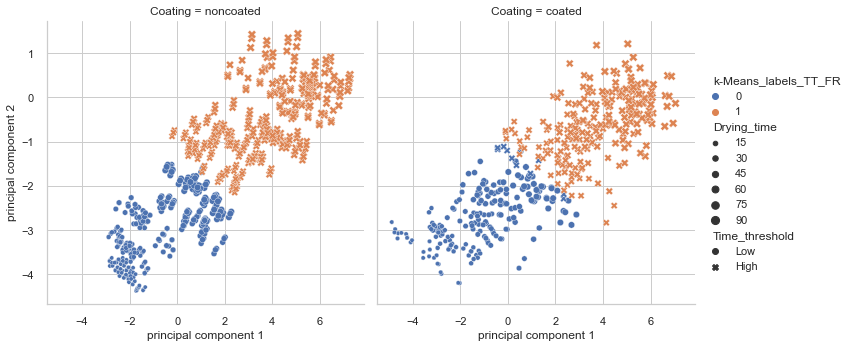

In [114]:
import seaborn as sns

# Apply the default theme
sns.set_theme(style="whitegrid")

# Create a visualization
sns.relplot(
    data=df_FR,
    x="principal component 1", y="principal component 2", col="Coating",
    hue="k-Means_labels_TT_FR", 
    style="Time_threshold", 
    size="Drying_time",
)

### Reporte de métricas

In [115]:
from sklearn import metrics
print("__________________________________________________________")
print("Time threshold")
print("++++++++++++++++")
print("Rand Score: ", metrics.rand_score(labels_FR_TT, etiquetas_FR_TT))
print("----------------------------------------------------------")
print("Adjusted rand score: ", metrics.adjusted_rand_score(labels_FR_TT, etiquetas_FR_TT))
print("----------------------------------------------------------")
print("Adjusted mutual information score: ", metrics.adjusted_mutual_info_score(labels_FR_TT, etiquetas_FR_TT))
print("----------------------------------------------------------")
print("Homogeneity: ", metrics.homogeneity_score(labels_FR_TT, etiquetas_FR_TT))
print("Completeness: ", metrics.completeness_score(labels_FR_TT, etiquetas_FR_TT))
print("V_measure_score: ", metrics.v_measure_score(labels_FR_TT, etiquetas_FR_TT))
print("__________________________________________________________")

__________________________________________________________
Time threshold
++++++++++++++++
Rand Score:  0.978281446002965
----------------------------------------------------------
Adjusted rand score:  0.9565628643957
----------------------------------------------------------
Adjusted mutual information score:  0.9151808618688451
----------------------------------------------------------
Homogeneity:  0.9152062320877652
Completeness:  0.9152588918060107
V_measure_score:  0.9152325611894176
__________________________________________________________


# (!) Para las muestras FR_noncoated se observa un posible 3er cluster a long times.

## Filtro noncoated

In [116]:
df.head()

,principal component 1,principal component 2,principal component 3,ID,ID_time,Drying_time,Tipo,Coating,True_labels_ID,k-Means_labels_ID,True_labels_Tipo,k-Means_labels_Tipo,True_labels_Time,k-Means_labels_Time,Time_threshold,True_labels_TT,k-Means_labels_TT
0,-1.421701,-4.347729,-0.568274,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,short,1,0
1,-2.062803,-4.028595,-0.345808,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,short,1,0
2,-2.815852,-3.797231,0.472913,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,short,1,0
3,-2.708706,-3.794129,0.178710,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,short,1,0
4,-1.857477,-4.214011,0.179008,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,short,1,0


In [117]:
df_nonC = df_FR[df_FR["Coating"]=="noncoated"]

In [118]:
df_nonC["Coating"].value_counts()

noncoated    723
Name: Coating, dtype: int64

In [119]:
# Separating out the features
x = df_nonC.loc[:, features].values
# Separating out the target
y = df_nonC.loc[:, sample].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
print(x)

[[-1.03617045 -1.78221993 -1.35569383]
 [-1.26980361 -1.56243629 -0.93121306]
 [-1.54423295 -1.40309865  0.63096119]
 ...
 [ 0.85517684  2.09649429  1.32773343]
 [ 1.57582504  1.56542615  0.00896776]
 [ 1.88749977  1.54501394 -0.73066646]]


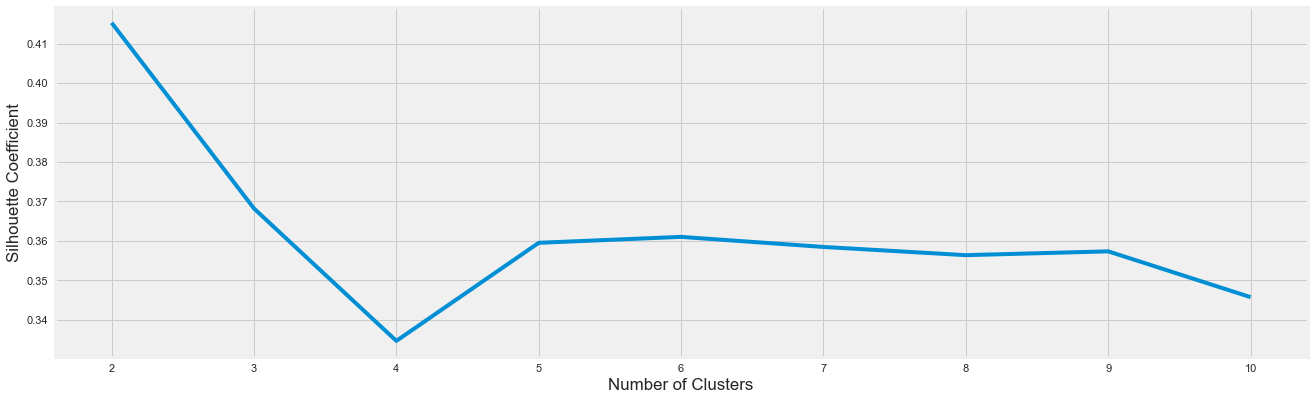

In [120]:
###CÁLCULO DE SILHOUETTE_COEFFICIENTS###
silhouette_coefficients = []

kmeans_kwargs = {
    #"init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', **kmeans_kwargs)
    kmeans.fit(x)
    score = silhouette_score(x, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.figure(figsize=(20,6))
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

C:\Users\Diez\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


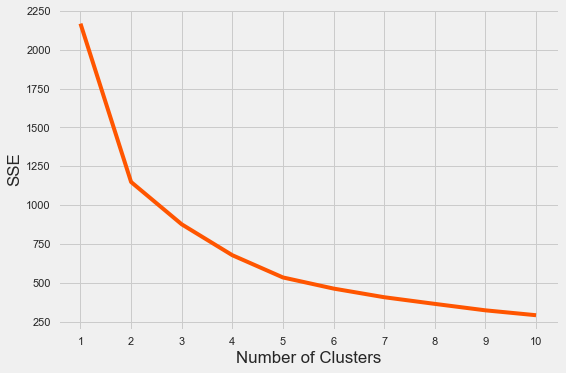

3

In [121]:
from kneed import KneeLocator

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', **kmeans_kwargs)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
   
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse, color='#ff5500')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

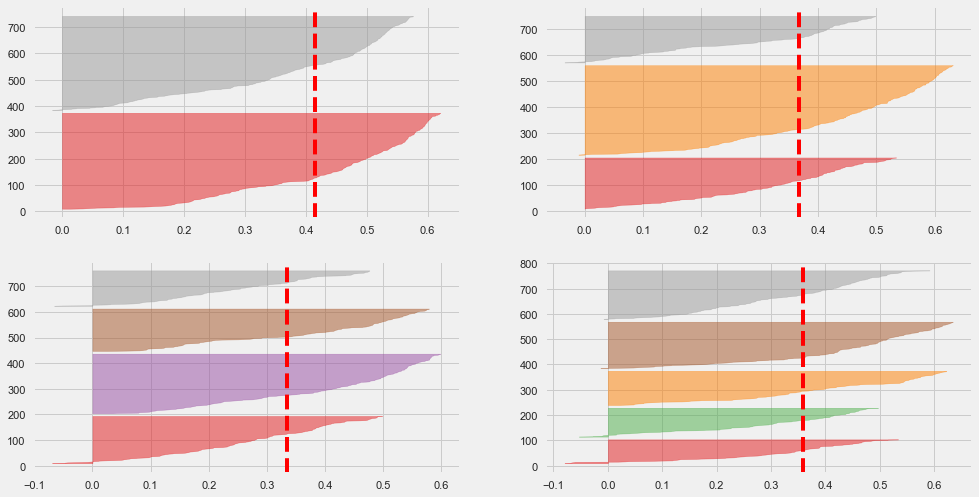

In [122]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.style import set_palette
set_palette('flatui')

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, 
                                      #colors='yellowbrick', 
                                      ax=ax[q-1][mod])
    visualizer.fit(x)

In [123]:
from sklearn.cluster import KMeans
n = 2
k_means = KMeans(n_clusters=n)
k_means.fit(x)

KMeans(n_clusters=2)

In [124]:
df_nonC["Time_threshold"].value_counts()

Low     363
High    360
Name: Time_threshold, dtype: int64

In [125]:
df_nonC.columns

Index(['principal component 1', 'principal component 2',
       'principal component 3', 'ID', 'ID_time', 'Drying_time', 'Tipo',
       'Coating', 'True_labels_ID', 'k-Means_labels_ID', 'True_labels_Tipo',
       'k-Means_labels_Tipo', 'True_labels_Time', 'k-Means_labels_Time',
       'Time_threshold', 'True_labels_TT', 'k-Means_labels_TT',
       'True_labels_TT_FR', 'k-Means_labels_TT_FR'],
      dtype='object')

In [126]:
conditionlist = [
    (df_nonC['Drying_time'] >= 60) ,
    #(df_nonC['Drying_time'] >= 60) & (df_nonC['Drying_time'] <90),
    (df_nonC['Drying_time'] <= 50)]
choicelist = ['High', 
              #'Mid', 
              'Low']
df_nonC['Time_threshold'] = np.select(conditionlist, choicelist, default='Not Specified')

C:\Users\Diez\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [127]:
df_nonC["Time_threshold"].value_counts()

Low     363
High    360
Name: Time_threshold, dtype: int64

In [128]:
###POR CATEGORÍA DE TIEMPO###
True_labels_TT_nonC=df_nonC.Time_threshold
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
True_labels_encoded_TT_nonC=le.fit_transform(True_labels_TT_nonC)
print(True_labels_encoded_TT_nonC)
True_labels_encoded_TT_nonC.shape

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

(723,)

In [129]:
centroides_nonC_TT = k_means.cluster_centers_
etiquetas_nonC_TT = k_means.labels_
labels_nonC_TT = True_labels_encoded_TT_nonC
print("Etiquetas:\n", etiquetas_nonC_TT)
print("..................................")
print("Centroides:\n", centroides_nonC_TT)
print("..................................")
print("True labels:\n", labels_nonC_TT)

Etiquetas:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 

In [130]:
df_nonC["True_labels_TT_nonC"] = labels_nonC_TT
df_nonC["k-Means_labels_TT_nonC"] = etiquetas_nonC_TT
df_nonC.head()

C:\Users\Diez\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Diez\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,principal component 1,principal component 2,principal component 3,ID,ID_time,Drying_time,Tipo,Coating,True_labels_ID,k-Means_labels_ID,...,k-Means_labels_Tipo,True_labels_Time,k-Means_labels_Time,Time_threshold,True_labels_TT,k-Means_labels_TT,True_labels_TT_FR,k-Means_labels_TT_FR,True_labels_TT_nonC,k-Means_labels_TT_nonC
0,-1.421701,-4.347729,-0.568274,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,...,0,0,3,Low,1,0,1,0,1,1
1,-2.062803,-4.028595,-0.345808,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,...,0,0,3,Low,1,0,1,0,1,1
2,-2.815852,-3.797231,0.472913,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,...,0,0,3,Low,1,0,1,0,1,1
3,-2.708706,-3.794129,0.178710,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,...,0,0,3,Low,1,0,1,0,1,1
4,-1.857477,-4.214011,0.179008,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,...,0,0,3,Low,1,0,1,0,1,1


In [131]:
print(df_nonC["True_labels_TT_nonC"].value_counts())
print(df_nonC["k-Means_labels_TT_nonC"].value_counts())

1    363
0    360
Name: True_labels_TT_nonC, dtype: int64
1    365
0    358
Name: k-Means_labels_TT_nonC, dtype: int64


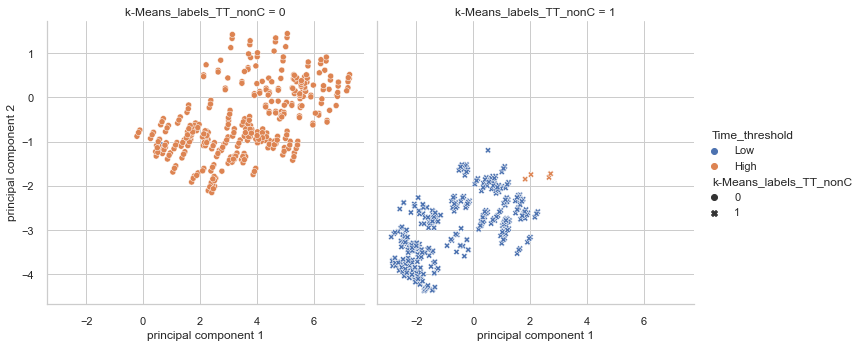

In [132]:
import seaborn as sns

# Apply the default theme
sns.set_theme(style="whitegrid")

# Create a visualization
sns.relplot(
    data=df_nonC,
    x="principal component 1", y="principal component 2",col="k-Means_labels_TT_nonC",
    hue="Time_threshold", 
    style="k-Means_labels_TT_nonC", 
    #size="Drying_time",
)

## Comprobamos que no hay alineamientos por categorías de tiempo a tiempos largos. El único threshold que naturalmente separa k-Means es drying_time>60 en FR samples.

## Filtro OD - K=3

In [133]:
df.head()

,principal component 1,principal component 2,principal component 3,ID,ID_time,Drying_time,Tipo,Coating,True_labels_ID,k-Means_labels_ID,True_labels_Tipo,k-Means_labels_Tipo,True_labels_Time,k-Means_labels_Time,Time_threshold,True_labels_TT,k-Means_labels_TT
0,-1.421701,-4.347729,-0.568274,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,short,1,0
1,-2.062803,-4.028595,-0.345808,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,short,1,0
2,-2.815852,-3.797231,0.472913,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,short,1,0
3,-2.708706,-3.794129,0.178710,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,short,1,0
4,-1.857477,-4.214011,0.179008,FR_noncoated,FR_noncoated_10,10,FR,noncoated,1,1,0,0,0,3,short,1,0


In [134]:
df_OD = df[df["Tipo"]=="OD"]

In [135]:
df_OD["Tipo"].value_counts()

OD    1491
Name: Tipo, dtype: int64

In [136]:
df_OD.Time_threshold.value_counts()

short    776
long     715
Name: Time_threshold, dtype: int64

In [137]:
# Separating out the features
x = df_OD.loc[:, features].values
# Separating out the target
y = df_OD.loc[:, sample].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
print(x)

[[-1.04125349 -1.90899413 -0.44745451]
 [-2.25800833 -0.71163549 -1.12638844]
 [-0.8886927  -2.14668233 -0.35762651]
 ...
 [ 0.83871147  1.06451156  2.07939651]
 [ 0.94475513  1.16381676  2.19803249]
 [ 1.17895582  0.76205628  2.06325065]]


k:  2 - Silhouette_coefficients:  0.335  ±  0.156
k:  3 - Silhouette_coefficients:  0.324  ±  0.169
k:  4 - Silhouette_coefficients:  0.316  ±  0.166
k:  5 - Silhouette_coefficients:  0.309  ±  0.157
k:  6 - Silhouette_coefficients:  0.297  ±  0.156
k:  7 - Silhouette_coefficients:  0.295  ±  0.153
k:  8 - Silhouette_coefficients:  0.282  ±  0.152
k:  9 - Silhouette_coefficients:  0.287  ±  0.161
k:  10 - Silhouette_coefficients:  0.285  ±  0.163


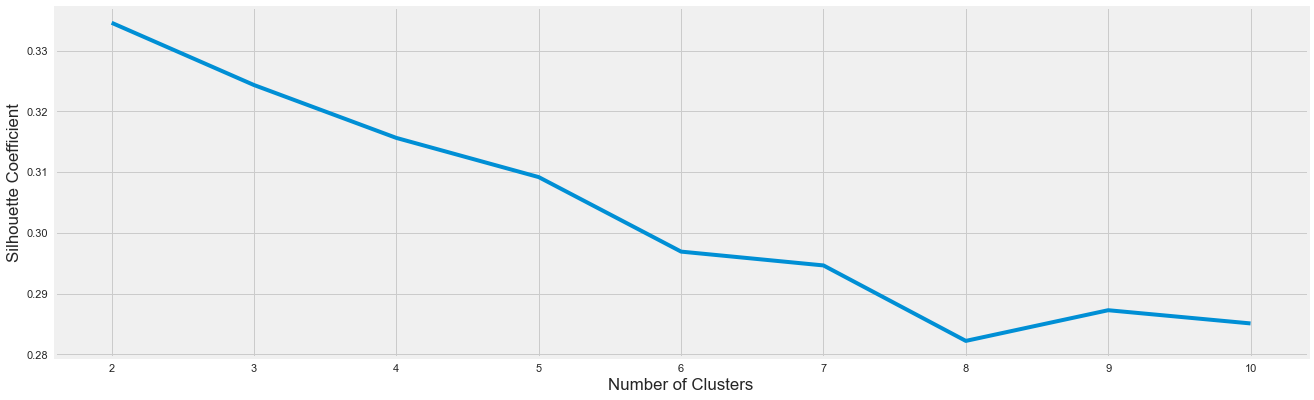

In [138]:
###CÁLCULO DE SILHOUETTE_COEFFICIENTS###
silhouette_coefficients = []
silhouette_values = []

kmeans_kwargs = {
    #"init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', **kmeans_kwargs)
    kmeans.fit(x)
    score = silhouette_score(x, kmeans.labels_)
    silhouette_coefficients.append(score)
    i_score = silhouette_samples(x, kmeans.labels_)
    silhouette_values.append(i_score)
    print("k: ", k, 
          "- Silhouette_coefficients: ", round(score, 3),
          " ± ", round(i_score.std(), 3))
    
plt.figure(figsize=(20,6))
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

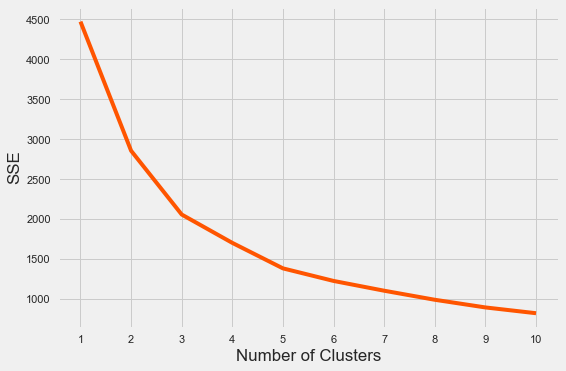

3

In [139]:
from kneed import KneeLocator

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', **kmeans_kwargs)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
   
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse, color='#ff5500')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

In [140]:
try:
    # See #1137: this allows compatibility for scikit-learn >= 0.24
    from sklearn.utils import safe_indexing
except ImportError:
    from sklearn.utils import _safe_indexing

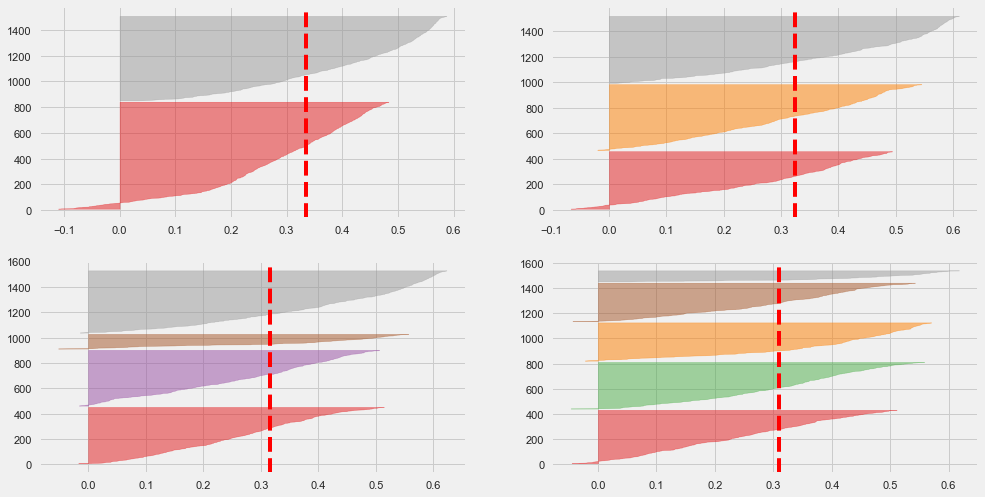

In [141]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.style import set_palette
set_palette('flatui')

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, 
                                      #colors='yellowbrick', 
                                      ax=ax[q-1][mod])
    visualizer.fit(x)

In [142]:
from sklearn.cluster import KMeans
n = 3
k_means = KMeans(n_clusters=n, init='k-means++')
k_means.fit(x)

KMeans(n_clusters=3)

In [143]:
conditionlist = [
    (df_OD['Drying_time'] >= 90) ,
    (df_OD['Drying_time'] >= 60) & (df_OD['Drying_time'] <90),
    (df_OD['Drying_time'] <= 50)]
choicelist = ['High', 
              'Mid', 
              'Low']
df_OD['Time_threshold'] = np.select(conditionlist, choicelist, default='Not Specified')

C:\Users\Diez\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [144]:
df_OD["Time_threshold"].value_counts()

Low     776
Mid     454
High    261
Name: Time_threshold, dtype: int64

In [145]:
###POR CATEGORÍA DE TIEMPO###
True_labels_OD=df_OD.Time_threshold
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
True_labels_encoded_OD=le.fit_transform(True_labels_OD)
print(True_labels_encoded_OD)
True_labels_encoded_OD.shape

[1 1 1 ... 0 0 0]


(1491,)

In [146]:
centroides_OD_TT = k_means.cluster_centers_
etiquetas_OD_TT = k_means.labels_
labels_OD_TT = True_labels_encoded_OD
print("Etiquetas:\n", etiquetas_OD_TT)
print("..................................")
print("Centroides:\n", centroides_OD_TT)
print("..................................")
print("True labels:\n", labels_OD_TT)

Etiquetas:
 [0 0 0 ... 1 1 1]
..................................
Centroides:
 [[-0.8619151  -1.00904981 -0.27803472]
 [ 0.03553055  0.84673442  1.05398313]
 [ 0.84753621  0.28713384 -0.63956925]]
..................................
True labels:
 [1 1 1 ... 0 0 0]


In [147]:
df_OD["True_labels_TT_OD"] = labels_OD_TT
df_OD["k-Means_labels_TT_OD"] = etiquetas_OD_TT
df_OD.head()

C:\Users\Diez\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Diez\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,principal component 1,principal component 2,principal component 3,ID,ID_time,Drying_time,Tipo,Coating,True_labels_ID,k-Means_labels_ID,True_labels_Tipo,k-Means_labels_Tipo,True_labels_Time,k-Means_labels_Time,Time_threshold,True_labels_TT,k-Means_labels_TT,True_labels_TT_OD,k-Means_labels_TT_OD
1185,-2.550514,-0.757714,-0.656442,OD_noncoated,OD_noncoated_10,10,OD,noncoated,3,2,1,1,0,1,Low,1,1,1,0
1186,-4.285921,0.582659,-1.435335,OD_noncoated,OD_noncoated_10,10,OD,noncoated,3,2,1,1,0,1,Low,1,1,1,0
1187,-2.332923,-1.023792,-0.553389,OD_noncoated,OD_noncoated_10,10,OD,noncoated,3,2,1,1,0,1,Low,1,1,1,0
1188,-4.331518,0.118384,-0.091756,OD_noncoated,OD_noncoated_10,10,OD,noncoated,3,2,1,1,0,9,Low,1,1,1,0
1189,-4.613286,0.521271,-0.113335,OD_noncoated,OD_noncoated_10,10,OD,noncoated,3,2,1,1,0,9,Low,1,1,1,0


In [148]:
print(df_OD["True_labels_TT_OD"].value_counts())
print(df_OD["k-Means_labels_TT_OD"].value_counts())

1    776
2    454
0    261
Name: True_labels_TT_OD, dtype: int64
0    525
2    515
1    451
Name: k-Means_labels_TT_OD, dtype: int64


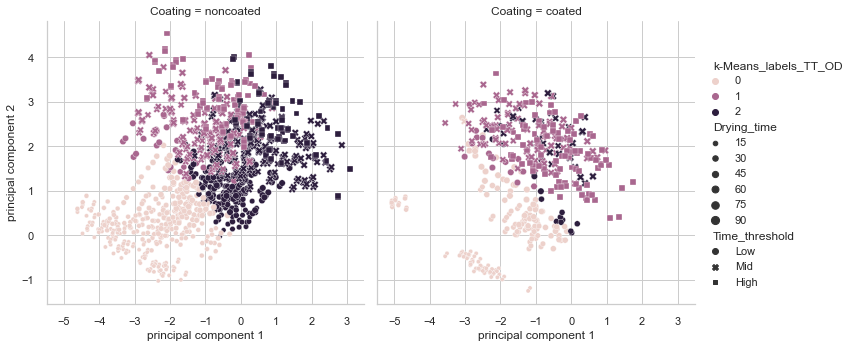

In [149]:
import seaborn as sns

# Apply the default theme
sns.set_theme(style="whitegrid")

# Create a visualization
sns.relplot(
    data=df_OD,
    x="principal component 1", y="principal component 2", col="Coating",
    hue="k-Means_labels_TT_OD", 
    style="Time_threshold", 
    size="Drying_time",
)

### Reporte de métricas

In [150]:
from sklearn import metrics
print("__________________________________________________________")
print("Time threshold")
print("++++++++++++++++")
print("Rand Score: ", metrics.rand_score(labels_OD_TT, etiquetas_OD_TT))
print("----------------------------------------------------------")
print("Adjusted rand score: ", metrics.adjusted_rand_score(labels_OD_TT, etiquetas_OD_TT))
print("----------------------------------------------------------")
print("Adjusted mutual information score: ", metrics.adjusted_mutual_info_score(labels_OD_TT, etiquetas_OD_TT))
print("----------------------------------------------------------")
print("Homogeneity: ", metrics.homogeneity_score(labels_OD_TT, etiquetas_OD_TT))
print("Completeness: ", metrics.completeness_score(labels_OD_TT, etiquetas_OD_TT))
print("V_measure_score: ", metrics.v_measure_score(labels_OD_TT, etiquetas_OD_TT))
print("__________________________________________________________")

__________________________________________________________
Time threshold
++++++++++++++++
Rand Score:  0.6862634419492346
----------------------------------------------------------
Adjusted rand score:  0.3250395431319455
----------------------------------------------------------
Adjusted mutual information score:  0.3489579430851586
----------------------------------------------------------
Homogeneity:  0.36531465140224706
Completeness:  0.3355313515739302
V_measure_score:  0.3497901627867929
__________________________________________________________


## Filtro OD - K=2

In [151]:
x.shape

(1491, 3)

In [152]:
from sklearn.cluster import KMeans
n = 2
k_means = KMeans(n_clusters=n, init='k-means++')
k_means.fit(x)

KMeans(n_clusters=2)

In [153]:
conditionlist = [
    (df_OD['Drying_time'] >= 50) ,
    #(df_OD['Drying_time'] >= 60) & (df_OD['Drying_time'] <90),
    (df_OD['Drying_time'] <= 40)]
choicelist = ['High', 
              #'Mid', 
              'Low']
df_OD['Time_threshold'] = np.select(conditionlist, choicelist, default='Not Specified')

C:\Users\Diez\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [154]:
df_OD["Time_threshold"].value_counts()

High    876
Low     615
Name: Time_threshold, dtype: int64

In [155]:
###POR CATEGORÍA DE TIEMPO###
True_labels_OD=df_OD.Time_threshold
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
True_labels_encoded_OD=le.fit_transform(True_labels_OD)
print(True_labels_encoded_OD)
True_labels_encoded_OD.shape

[1 1 1 ... 0 0 0]


(1491,)

In [156]:
centroides_OD_TT = k_means.cluster_centers_
etiquetas_OD_TT = k_means.labels_
labels_OD_TT = True_labels_encoded_OD
print("Etiquetas:\n", etiquetas_OD_TT)
print("..................................")
print("Centroides:\n", centroides_OD_TT)
print("..................................")
print("True labels:\n", labels_OD_TT)

Etiquetas:
 [0 0 0 ... 1 1 1]
..................................
Centroides:
 [[-0.61646066 -0.8959748  -0.429714  ]
 [ 0.48827834  0.70967235  0.34036241]]
..................................
True labels:
 [1 1 1 ... 0 0 0]


In [157]:
df_OD["True_labels_TT_OD_2"] = labels_OD_TT
df_OD["k-Means_labels_TT_OD_2"] = etiquetas_OD_TT
df_OD.head()

C:\Users\Diez\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Diez\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,principal component 1,principal component 2,principal component 3,ID,ID_time,Drying_time,Tipo,Coating,True_labels_ID,k-Means_labels_ID,...,k-Means_labels_Tipo,True_labels_Time,k-Means_labels_Time,Time_threshold,True_labels_TT,k-Means_labels_TT,True_labels_TT_OD,k-Means_labels_TT_OD,True_labels_TT_OD_2,k-Means_labels_TT_OD_2
1185,-2.550514,-0.757714,-0.656442,OD_noncoated,OD_noncoated_10,10,OD,noncoated,3,2,...,1,0,1,Low,1,1,1,0,1,0
1186,-4.285921,0.582659,-1.435335,OD_noncoated,OD_noncoated_10,10,OD,noncoated,3,2,...,1,0,1,Low,1,1,1,0,1,0
1187,-2.332923,-1.023792,-0.553389,OD_noncoated,OD_noncoated_10,10,OD,noncoated,3,2,...,1,0,1,Low,1,1,1,0,1,0
1188,-4.331518,0.118384,-0.091756,OD_noncoated,OD_noncoated_10,10,OD,noncoated,3,2,...,1,0,9,Low,1,1,1,0,1,0
1189,-4.613286,0.521271,-0.113335,OD_noncoated,OD_noncoated_10,10,OD,noncoated,3,2,...,1,0,9,Low,1,1,1,0,1,0


In [158]:
print(df_OD["True_labels_TT_OD_2"].value_counts())
print(df_OD["k-Means_labels_TT_OD_2"].value_counts())

0    876
1    615
Name: True_labels_TT_OD_2, dtype: int64
1    833
0    658
Name: k-Means_labels_TT_OD_2, dtype: int64


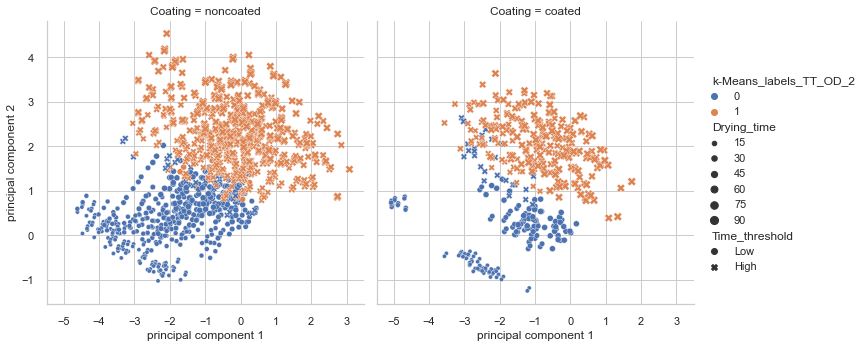

In [159]:
import seaborn as sns

# Apply the default theme
sns.set_theme(style="whitegrid")

# Create a visualization
sns.relplot(
    data=df_OD,
    x="principal component 1", y="principal component 2", col="Coating",
    hue="k-Means_labels_TT_OD_2", 
    style="Time_threshold", 
    size="Drying_time",
)

### Reporte de métricas

In [160]:
from sklearn import metrics
print("__________________________________________________________")
print("Time threshold")
print("++++++++++++++++")
print("Rand Score: ", metrics.rand_score(labels_OD_TT, etiquetas_OD_TT))
print("----------------------------------------------------------")
print("Adjusted rand score: ", metrics.adjusted_rand_score(labels_OD_TT, etiquetas_OD_TT))
print("----------------------------------------------------------")
print("Adjusted mutual information score: ", metrics.adjusted_mutual_info_score(labels_OD_TT, etiquetas_OD_TT))
print("----------------------------------------------------------")
print("Homogeneity: ", metrics.homogeneity_score(labels_OD_TT, etiquetas_OD_TT))
print("Completeness: ", metrics.completeness_score(labels_OD_TT, etiquetas_OD_TT))
print("V_measure_score: ", metrics.v_measure_score(labels_OD_TT, etiquetas_OD_TT))
print("__________________________________________________________")

__________________________________________________________
Time threshold
++++++++++++++++
Rand Score:  0.9190093581623971
----------------------------------------------------------
Adjusted rand score:  0.8379549813540865
----------------------------------------------------------
Adjusted mutual information score:  0.7591325069236735
----------------------------------------------------------
Homogeneity:  0.7640102971334135
Completeness:  0.754550771056511
V_measure_score:  0.7592510711265398
__________________________________________________________
